<a href="https://colab.research.google.com/github/Jofreriho/DataPandan/blob/main/Proyecto_CCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalación e Importación de librerías**


In [ ]:
#Instalamos librerias
!pip install fuzzywuzzy
!pip install googletrans #instalamos la libreria de google tlanslator para traducir a español las variables categoricas
!pip install levenshtein #insatalamos levenshtein para agilizar la computacion de la comparacion de textos
!pip install skimpy

# Instalación de Streamlit, una biblioteca de Python para construir aplicaciones web interactivas.
!pip install -q streamlit

# Instalación de localtunnel, una herramienta para exponer servidores locales a la web
!npm install -q localtunnel

# Instalación de pyngrok, una biblioteca para integrar
#ngrok (herramienta para exponer servidores locales).
# https://ngrok.com/
!pip install pyngrok

#Georefenciacion
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipyk

In [ ]:
#importamos las librerias
import pandas as pd #importamos pandas para analisis estadistico
import numpy as np #importamos numpy para reslizar operaciones matematicas
import matplotlib.pyplot as plt #importamos pyplot de matplotlib para graficar
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns #importamos seaborn para graficos estadisticos
from googletrans import Translator, constants
from fuzzywuzzy import process
import statistics #importamos libreraria para analisis estadisticos
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm
import statistics as st
from statistics import mode
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from skimpy import skim
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Conectamos con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Definimos tema de los graficos
sns.set_theme(style="whitegrid", palette="muted")

Lectura de Archivos

In [ ]:
#Cargamos Dataset1
##Variable con la ruta de datos
UrlDataset_Doe = "https://github.com/ManuAF-291196/Proyecto_TalentoTech/blob/data_analysis/CCS_Map_Data_Jan2023.xlsx"

proyectos_doe=pd.read_excel(UrlDataset_Doe, sheet_name="Map Data", index_col=0) #base de datos del doe

proyectos_doe

Project Name  \
Project ID                                                      
387                          Lost Cabin Gas Plant CCS Project   
390                          Getica CCS Demonstration Project   
395                      Project Tundra Carbon Capture System   
396         North Dakota CarbonSAFE Phase III: Site Charac...   
397         Front End Engineering Design of Linde-BASF Adv...   
...                                                       ...   
494                Axe Seine/Normandy decarbonization project   
495                                    CCS with Elkem Iceland   
496                                 Blue Planet's pilot plant   
497                         Heartland Greenway System Storage   
498                                       Polaris CCS Project   

                                                      Company  \
Project ID                                                      
387                                   ConocoPhillips, Denbury   
390                                Getica CCS Project Company   
395                                Minnkota Power Cooperative   
396         Energy & Environmental Research Center - Unive...   
397                                          Southern Company   
...                                                       ...   
494                                               Air Liquide   
495                                       Aker Carbon Capture   
496                           Blue Planet Systems Corporation   
497                                    Navigator CO2 Ventures   
498                                                     Shell   

                                                   Plant Name  \
Project ID                                                      
387                                      Lost Cabin Gas Plant   
390         Turceni Power Station (now part of Oltenia Ene...   
395                                   Milton R. Young Station   
396                                   Milton R. Young Station   
397                                Plant Daniel Units 3 and 4   
...                                                       ...   
494                                                       NaN   
495                          Elkem Iceland ferrosilicon plant   
496                                   Blue Planet pilot plant   
497                                                       NaN   
498                     Scotford refinery and chemicals plant   

           Storage and/or Capture Overall Status Plant Status  \
Project ID                                                      
387                       Capture            NaN          NaN   
390           Capture and Storage           Hold     Existing   
395                       Capture         Active     Existing   
396                       Storage         Active     Existing   
397                       Capture         Active     Existing   
...                           ...            ...          ...   
494                          Plan      Potential          NaN   
495           Capture and Storage      Potential          NaN   
496           Capture and Storage         Active          NaN   
497                           NaN      Potential          NaN   
498           Capture and Storage      Potential          NaN   

                          Project Phase Country Location State Location  \
Project ID                                                                
387                         Operational    United States        Wyoming   
390                            Planning          Romania    Gorj County   
395                  Engineering design    United States   North Dakota   
396               Site Characterization    United States   North Dakota   
397                  Engineering design    United States    Mississippi   
...                                 ...              ...            ...   
494         Memorandum of Understanding           France         

In [ ]:
proyectos_doe

Project Name  \
Project ID                                                      
387                          Lost Cabin Gas Plant CCS Project   
390                          Getica CCS Demonstration Project   
395                      Project Tundra Carbon Capture System   
396         North Dakota CarbonSAFE Phase III: Site Charac...   
397         Front End Engineering Design of Linde-BASF Adv...   
...                                                       ...   
494                Axe Seine/Normandy decarbonization project   
495                                    CCS with Elkem Iceland   
496                                 Blue Planet's pilot plant   
497                         Heartland Greenway System Storage   
498                                       Polaris CCS Project   

                                                      Company  \
Project ID                                                      
387                                   ConocoPhillips, Denbury   
390                                Getica CCS Project Company   
395                                Minnkota Power Cooperative   
396         Energy & Environmental Research Center - Unive...   
397                                          Southern Company   
...                                                       ...   
494                                               Air Liquide   
495                                       Aker Carbon Capture   
496                           Blue Planet Systems Corporation   
497                                    Navigator CO2 Ventures   
498                                                     Shell   

                                                   Plant Name  \
Project ID                                                      
387                                      Lost Cabin Gas Plant   
390         Turceni Power Station (now part of Oltenia Ene...   
395                                   Milton R. Young Station   
396                                   Milton R. Young Station   
397                                Plant Daniel Units 3 and 4   
...                                                       ...   
494                                                       NaN   
495                          Elkem Iceland ferrosilicon plant   
496                                   Blue Planet pilot plant   
497                                                       NaN   
498                     Scotford refinery and chemicals plant   

           Storage and/or Capture Overall Status Plant Status  \
Project ID                                                      
387                       Capture            NaN          NaN   
390           Capture and Storage           Hold     Existing   
395                       Capture         Active     Existing   
396                       Storage         Active     Existing   
397                       Capture         Active     Existing   
...                           ...            ...          ...   
494                          Plan      Potential          NaN   
495           Capture and Storage      Potential          NaN   
496           Capture and Storage         Active          NaN   
497                           NaN      Potential          NaN   
498           Capture and Storage      Potential          NaN   

                          Project Phase Country Location State Location  \
Project ID                                                                
387                         Operational    United States        Wyoming   
390                            Planning          Romania    Gorj County   
395                  Engineering design    United States   North Dakota   
396               Site Characterization    United States   North Dakota   
397                  Engineering design    United States    Mississippi   
...                                 ...              ...            ...   
494         Memorandum of Understanding           France         

In [ ]:
#Cargamos los datos
#Dataset2
proyectos_iea=pd.read_excel("https://github.com/ManuAF-291196/Proyecto_TalentoTech/blob/data_analysis/IEA_CCUS_Projects_Database_2024.xlsx", sheet_name="CCUS_Projects_Database", index_col=1)


In [ ]:
#DataFrame de China
df_China =pd.read_excel("https://github.com/ManuAF-291196/Proyecto_TalentoTech/blob/data_analysis/China.xlsx", sheet_name="China", index_col=0)
df_China

**Dataset 1**

In [ ]:
#Informacion Preliminar DataSet1
pd.unique(proyectos_doe["Project Type"])
pd.unique(proyectos_doe['Overall Status'])
proyectos_doe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 387 to 498
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Project Name                            417 non-null    object        
 1   Company                                 416 non-null    object        
 2   Plant Name                              349 non-null    object        
 3   Storage and/or Capture                  404 non-null    object        
 4   Overall Status                          407 non-null    object        
 5   Plant Status                            283 non-null    object        
 6   Project Phase                           346 non-null    object        
 7   Country Location                        410 non-null    object        
 8   State Location                          356 non-null    object        
 9   Specific Site Location                  399 non-null    o

In [ ]:

##Limpieza Dataset1
##Eliminamos las columnas con informacion redundante o sin utilidad
##Lista de columnas a excluir

ColumnasExcluir = ["Plant Name","State Location","Specific Site Location"
,"Size or Capture Amount/unit base power","Power or Capture Unit"
,"Power or Capture Unit Base Code","Combustion / Separation","Capture Technology"
,"Project Summary","Project Date","Cost","Currency Name"
,"Project Information Webpage","Latitude","Longitude","Continent Code"
,"Country Code","District Code","DOE Support","Exact Checkbox","Exact"
,"Paper","Regional Partnership","Other","Scope Code","Scope Name","State Code"
,"Status Code","Injection Unit Base Code"
,"Project Name","Storage and/or Capture","Plant Status","Project Phase"
,"Company","Continent Name"]

if isinstance(proyectos_doe, pd.DataFrame) and len(proyectos_doe.columns) > 0:
  if("Company" in proyectos_doe.columns):
    proyectos_doe.drop(labels=ColumnasExcluir, axis=1, inplace=True)

#hacemos remplazo de un valor con error de digitacion
proyectos_doe['Project Type'].replace(to_replace="CCUST", value="CCUS", inplace=True)

##Equivalencias con Dataset2 de tipos d eproyect

proyectos_doe['Project Type'].replace(to_replace="CCUS", value="Full Chain", inplace=True)
proyectos_doe['Project Type'].replace(to_replace="CTS", value="T&S", inplace=True)
proyectos_doe['Project Type'].replace(to_replace="TS", value="T&S", inplace=True)
proyectos_doe['Project Type'].replace(to_replace="THS", value="T&S", inplace=True)

proyectos_doe['Project Type'].replace(to_replace="Tk", value="Transport", inplace=True)
proyectos_doe['Project Type'].replace(to_replace="Tk", value="Transport", inplace=True)

proyectos_doe['Project Type'].replace(to_replace="DACU", value="CCU", inplace=True)
proyectos_doe['Project Type'].replace(to_replace="CU", value="CCU", inplace=True)

proyectos_doe['Project Type'].replace(to_replace="EOR", value="Storage", inplace=True)

proyectos_doe['Project Type'].replace(to_replace="Direct Air Capture", value="Capture", inplace=True)

pd.unique(proyectos_doe["Project Type"])

#convertir todas las columnas en caracter
proyectos_doe['Country Location'] = proyectos_doe['Country Location'].astype("string")
proyectos_doe['Project Type'] = proyectos_doe['Project Type'].astype("string")
proyectos_doe['Overall Status'] = proyectos_doe['Overall Status'].astype("string")

##Eliminamos Nulos
proyectos_doe.dropna(inplace=True)


<ipython-input-72-aa19f96ccae1>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proyectos_doe['Project Type'].replace(to_replace="CCUST", value="CCUS", inplace=True)
<ipython-input-72-aa19f96ccae1>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:

##Datos que se quedaron en planificacion con informacion incompleta
proyectos_doe.drop(proyectos_doe[(proyectos_doe['Project Type']== "Hub")].index, inplace=True)
proyectos_doe.drop(proyectos_doe[(proyectos_doe['Project Type']== "Plan")].index, inplace=True)
proyectos_doe.drop(proyectos_doe[(proyectos_doe['Project Type']== "Roadmap")].index, inplace=True)
proyectos_doe.drop(proyectos_doe[(proyectos_doe['Project Type']== "Unknown")].index, inplace=True)



In [ ]:
proyectos_doe

Overall Status Country Location Project Type
Project ID                                             
390                  Hold          Romania          CCS
395                Active    United States      Capture
396                Active    United States      Storage
397                Active    United States      Capture
399                Active    United States      Capture
...                   ...              ...          ...
492             Potential    United States    Transport
495             Potential          Iceland          CCS
496                Active    United States          CCS
497             Potential    United States   Full Chain
498             Potential           Canada          CCS

[385 rows x 3 columns]

In [ ]:
pd.unique(proyectos_doe["Project Type"])

<StringArray>
['CCS', 'Capture', 'Storage', 'Transport', 'T&S', 'CCU', 'Full Chain']
Length: 7, dtype: string

In [ ]:
#Informacion Preliminar DataSet1
pd.unique(proyectos_doe['Overall Status'])

<StringArray>
['Hold', 'Active', 'Potential', 'Completed', 'Terminated']
Length: 5, dtype: string

In [ ]:
proyectos_doe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 390 to 498
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Overall Status    385 non-null    string
 1   Country Location  385 non-null    string
 2   Project Type      385 non-null    string
dtypes: string(3)
memory usage: 12.0 KB


In [ ]:
pd.unique(proyectos_doe["Project Type"])

<StringArray>
['CCS', 'Capture', 'Storage', 'Transport', 'T&S', 'CCU', 'Full Chain']
Length: 7, dtype: string

In [ ]:
##TRATAMIENTO DE DATOS
##TRADUCION
##Traducimos los valores unicos de cada columna para obtener los labels de
##nuestras graficas en español
translator=Translator() ##Llamamos la función translator de la libreria translate
##Ejecutamos las traducciones
proyectos_doe["Estado del Proyecto"] = [translation.text for translation in await translator.translate(proyectos_doe["Overall Status"].tolist(), dest="es", src="en")]
proyectos_doe["Tipo de Proyecto"] = [translation.text for translation in await translator.translate(proyectos_doe["Project Type"].tolist(), dest="es", src="en")]
proyectos_doe["Pais"] = [translation.text for translation in await translator.translate(proyectos_doe["Country Location"].tolist(), dest="es", src="en")]


In [ ]:
pd.unique(proyectos_doe["Pais"])

array(['Rumania', 'Estados Unidos', 'Canadá', 'Suiza', 'Argelia',
       'Australia', 'Porcelana', 'Dinamarca', 'Reino Unido', 'Francia',
       'Alemania', 'Italia', 'Japón', 'Malasia', 'Países Bajos',
       'Noruega', 'Polonia', 'Escocia', 'Brasil', 'India', 'Finlandia',
       'Corea del Sur', 'Emiratos Árabes Unidos', 'Irlanda', 'Bulgaria',
       'República Checa', 'Suecia', 'España', 'Islandia', 'México',
       'Inglaterra', 'Bahrain', 'unión Europea', 'Taiwán',
       'Arabia Saudita', 'Sudáfrica', 'Timor-Leste'], dtype=object)

In [ ]:
pd.unique(proyectos_doe["Tipo de Proyecto"])

array(['CCS', 'Captura', 'Almacenamiento', 'Transporte', 'T&S', 'CCU',
       'Cadena completa'], dtype=object)

In [ ]:
pd.unique(proyectos_doe["Estado del Proyecto"])

array(['Sostener', 'Activo', 'Potencial', 'Terminado', 'Finalizado'],
      dtype=object)

In [ ]:

##Limpieza de Datos en las traduciones,Paises
proyectos_doe["Pais"].replace({"Porcelana": "China"}, inplace=	True)

##Limpieza de traducion Estado del proyecto
proyectos_doe["Estado del Proyecto"].replace({"Sostener": "Pausado"}, inplace=	True)


<ipython-input-84-cd367c7f6740>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proyectos_doe["Pais"].replace({"Porcelana": "China"}, inplace=	True)
<ipython-input-84-cd367c7f6740>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
##Eliminamos columnas traducidas
ColumnasExcluir = ["Overall Status","Project Type","Country Location"]

if isinstance(proyectos_doe, pd.DataFrame) and len(proyectos_doe.columns) > 0:
  if("Overall Status" in proyectos_doe.columns):
    proyectos_doe.drop(labels=ColumnasExcluir, axis=1, inplace=True)


In [ ]:
proyectos_doe

Estado del Proyecto Tipo de Proyecto            Pais
Project ID                                                     
390                    Pausado              CCS         Rumania
395                     Activo          Captura  Estados Unidos
396                     Activo   Almacenamiento  Estados Unidos
397                     Activo          Captura  Estados Unidos
399                     Activo          Captura  Estados Unidos
...                        ...              ...             ...
492                  Potencial       Transporte  Estados Unidos
495                  Potencial              CCS        Islandia
496                     Activo              CCS  Estados Unidos
497                  Potencial  Cadena completa  Estados Unidos
498                  Potencial              CCS          Canadá

[385 rows x 3 columns]

In [ ]:
# Contar proyectos por país
proyectos_por_pais =proyectos_doe["Pais"].value_counts()
print("Proyectos por país:\n", proyectos_por_pais)

# Contar proyectos por tipo
proyectos_por_tipo = proyectos_doe["Tipo de Proyecto"].value_counts()
print("Proyectos por tipo:\n", proyectos_por_tipo)

# Contar proyectos por estado
proyectos_por_estado = proyectos_doe["Estado del Proyecto"].value_counts()
print("Proyectos segun estado:\n", proyectos_por_estado)


Proyectos por país:
 Pais
Estados Unidos            166
Australia                  30
Canadá                     25
China                      20
Noruega                    17
Japón                      16
Reino Unido                15
Países Bajos               12
Alemania                   10
Escocia                     8
Francia                     5
Polonia                     5
Italia                      4
Emiratos Árabes Unidos      4
Dinamarca                   4
Rumania                     3
República Checa             3
Inglaterra                  3
India                       3
España                      3
Brasil                      3
Suecia                      3
Suiza                       2
Argelia                     2
Malasia                     2
Sudáfrica                   2
Corea del Sur               2
Islandia                    2
Irlanda                     2
México                      2
Finlandia                   1
Bulgaria                    1
Bahrain       

Descripcion datos DATASET 1

In [ ]:
proyectos_doe.describe()

Estado del Proyecto Tipo de Proyecto            Pais
count                  385              385             385
unique                   5                7              37
top                 Activo              CCS  Estados Unidos
freq                   155              163             166

In [ ]:
proyectos_doe.reset_index(drop=True, inplace=True)
skim(proyectos_doe)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 385    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Estado    │  0 │    0 │ Activo   │ Finalizad │ Activo    │ Terminado │       7.77 │         1 │        385 │  │
│ │ del       │    │      │          │ o         │           │           │            │           │            │  │
│ │ Proyecto  │    │      │          │           │           │           │            │           │            │  │
│ │ Tipo de   │  0 │    0 │ CCS      │ Cadena    │ Almacenam │ Transport │       6.94 │         1 │        386 │  │
│ │ Proyecto  │    │      │          │ completa  │ iento     │ e         │            │           │            │  │
│ │ Pais      │  0 │    0 │ Suiza    │ Emiratos  │ Alemania  │ unión     │       10.6 │       1.5 │        595 │  │
│ │           │    │      │          │ Árabes    │           │ Europea   │            │           │            │  │
│ │           │    │      │          │ Unidos    │           │           │            │           │            │  │
│ └───────────┴────┴──────┴──────────┴───────────┴───────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

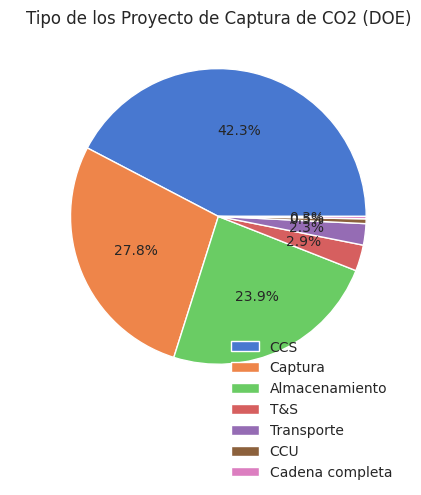

In [ ]:
#Tipos de proyectos
df_Tipo_doe= pd.DataFrame(proyectos_doe.value_counts(subset="Tipo de Proyecto", normalize=True, dropna=False))

df_Tipo_doe= df_Tipo_doe.rmul(other=100)

df_Tipo_doe.plot(kind="pie", y="proportion", legend=True, ylabel=" ",autopct='%1.1f%%'
  , textprops={'size': 'smaller'}, radius=1,labeldistance=None, title="Tipo de los Proyecto de Captura de CO2 (DOE)")

plt.legend(loc='best', bbox_to_anchor=(0.5,0.2), ncols=1, framealpha=0,fontsize="small")


plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_1/1_perc_tipo_does.png")
plt.show()

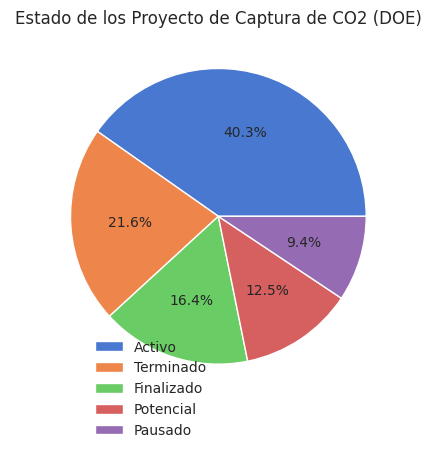

In [ ]:
##Estado
df_estado_doe= pd.DataFrame(proyectos_doe.value_counts(subset="Estado del Proyecto", normalize=True, dropna=False))
perc_estado_doe= df_estado_doe.rmul(other=100)

perc_estado_doe.plot(kind="pie", y="proportion", legend=True, ylabel=" ",autopct='%1.1f%%'
  , textprops={'size': 'smaller'}, radius=1,labeldistance=None, title="Estado de los Proyecto de Captura de CO2 (DOE)")

plt.legend(loc ='best', bbox_to_anchor=(0.5,0.2), ncols=1, framealpha=0,fontsize="small")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_1/2_perc_estado_doe.png")
plt.show()

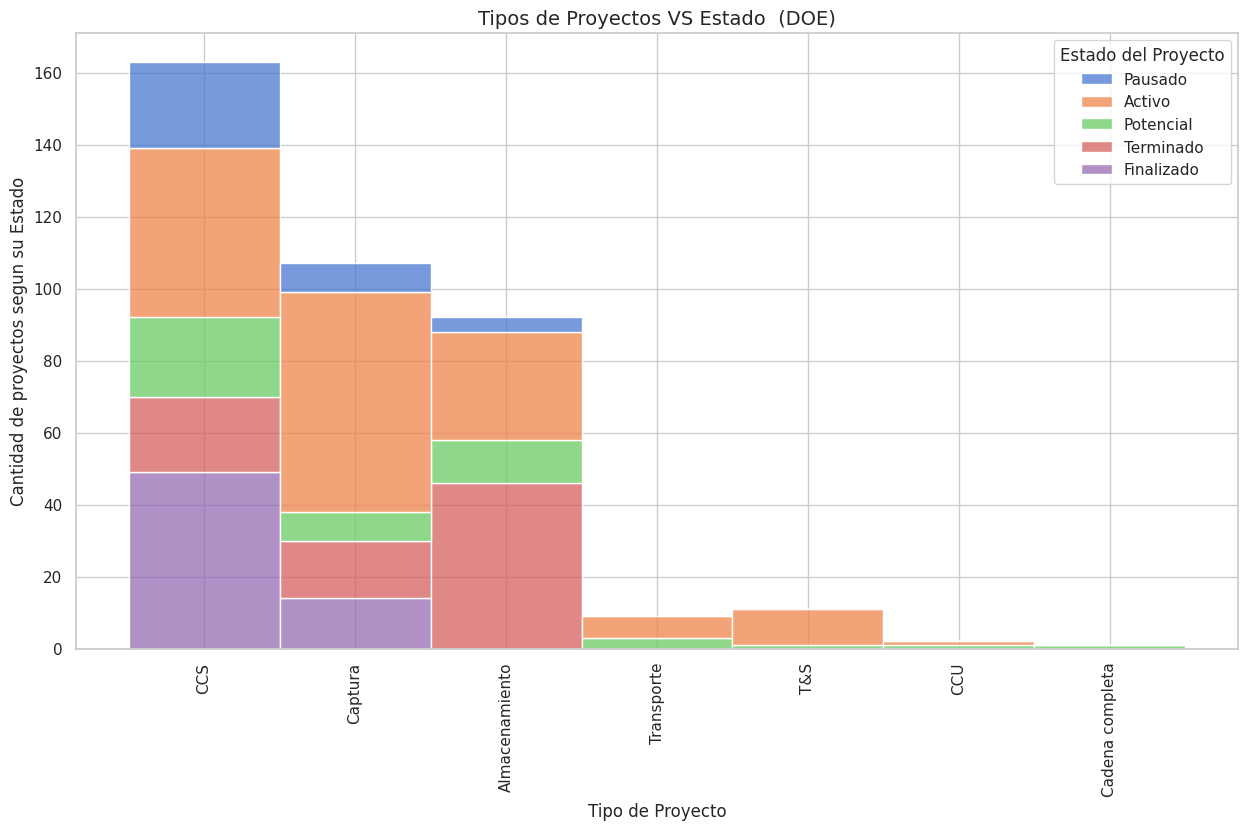

In [ ]:
n=proyectos_doe["Tipo de Proyecto"].unique().tolist()
ind=np.arange(len(n))
plt.figure(figsize=(15,8))

sns.histplot(proyectos_doe, x="Tipo de Proyecto", hue="Estado del Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)

plt.xticks(ind, n, rotation=90)
plt.xlabel("Tipo de Proyecto")
plt.ylabel("Cantidad de proyectos segun su Estado")
plt.title("Tipos de Proyectos VS Estado  (DOE)", fontsize=14)

plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_1/3_Tipo_Estado_doe.png")
plt.show()


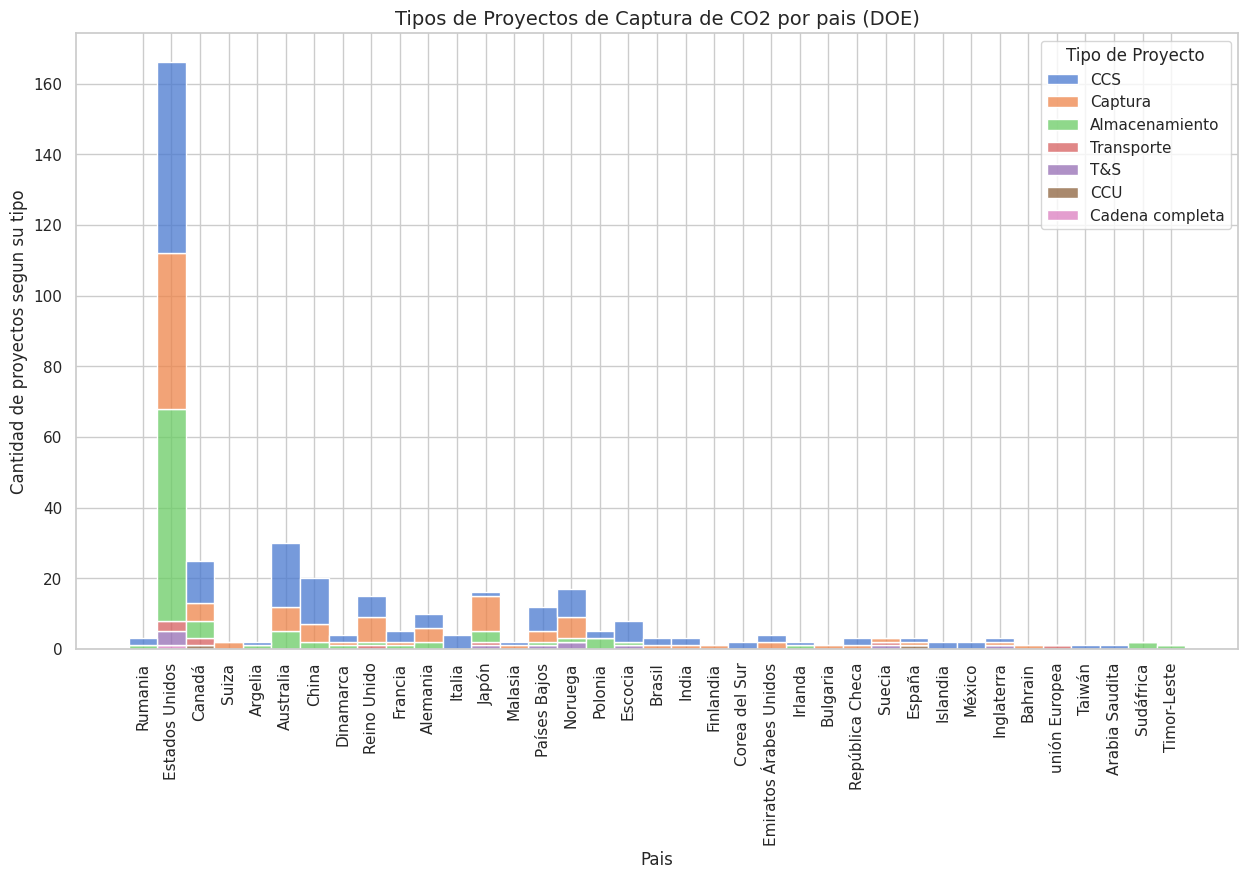

In [ ]:
n=proyectos_doe["Pais"].unique().tolist()
ind=np.arange(len(n))
plt.figure(figsize=(15,8))

sns.histplot(proyectos_doe, x="Pais", hue="Tipo de Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)

plt.xticks(ind, n, rotation=90)
plt.xlabel("Pais")
plt.ylabel("Cantidad de proyectos segun su tipo")
plt.title("Tipos de Proyectos de Captura de CO2 por pais (DOE)", fontsize=14)

plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_1/4_Tipo_Pais_doe.png")
plt.show()


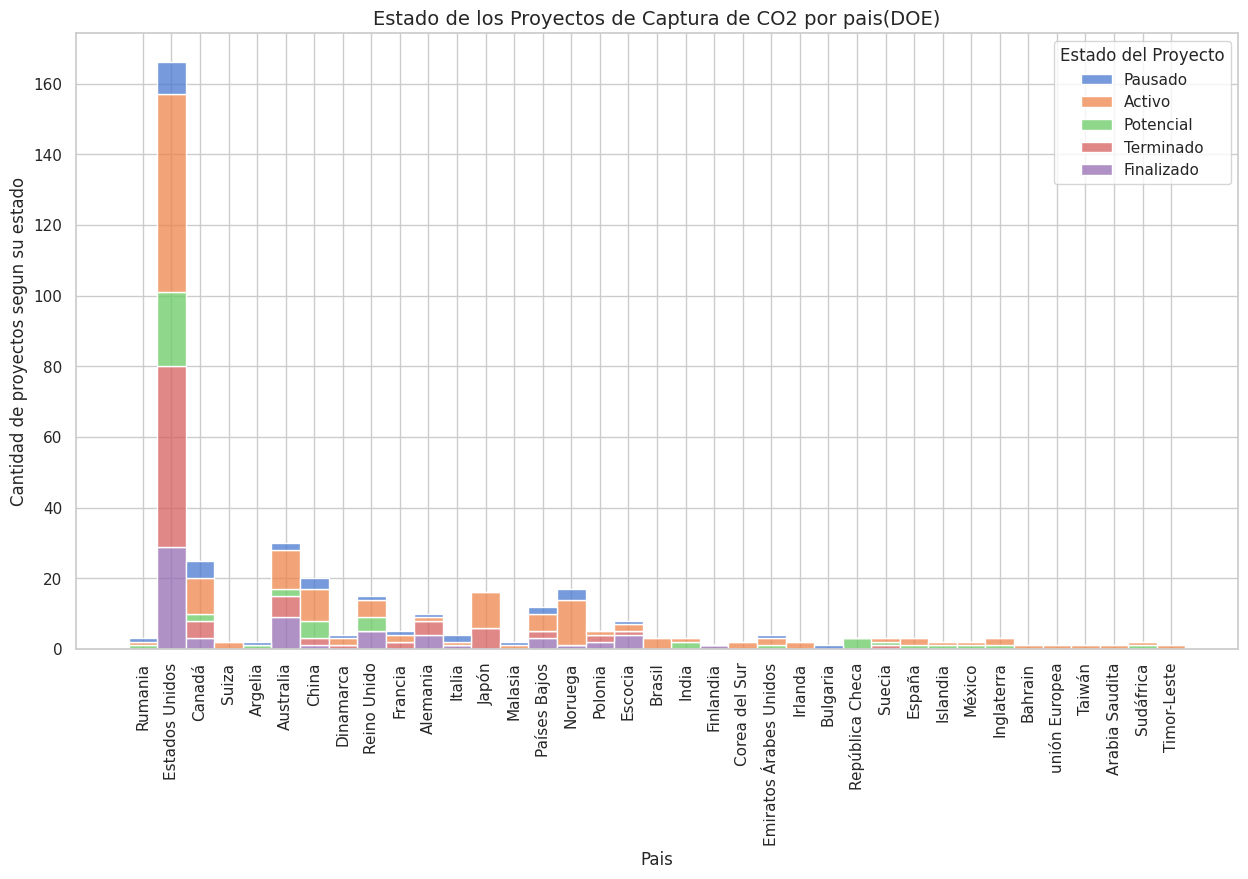

In [ ]:
p=proyectos_doe["Pais"].unique().tolist()
i=np.arange(len(n))
plt.figure(figsize=(15,8))
sns.histplot(proyectos_doe, x="Pais"
  , hue="Estado del Proyecto", stat="count"
  , multiple="stack", binwidth=1.5, legend=True)
plt.xticks(ind, n, rotation=90)
plt.xlabel("Pais")
plt.ylabel("Cantidad de proyectos segun su estado")
plt.title("Estado de los Proyectos de Captura de CO2 por pais(DOE)", fontsize=14)

plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_1/5_Estados_Pais_doe.png")
plt.show()

**Dataset 2**

Información Preliminar

In [ ]:
##Exploramos las columnas y los tipos de datos
proyectos_iea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844 entries, 751 to 725
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Project name                           844 non-null    object 
 1   Country                                844 non-null    object 
 2   Partners                               844 non-null    object 
 3   Project type                           844 non-null    object 
 4   Announcement                           824 non-null    float64
 5   FID                                    255 non-null    float64
 6   Operation                              553 non-null    float64
 7   Suspension/decommissioning             6 non-null      float64
 8   Project Status                         844 non-null    object 
 9   Project phase                          180 non-null    float64
 10  Announced capacity (Mt CO2/yr)         614 non-null    float64
 11  Estimated

In [ ]:
#Obtenemos los valores unicos dentro de cada columna
print(proyectos_iea["Country"].unique().tolist())
print(proyectos_iea["Project type"].unique().tolist())
print(proyectos_iea["Project Status"].unique().tolist())


['France', 'Qatar', 'United States', 'Indonesia', 'United Kingdom', 'Australia', 'United Arab Emirates', 'Netherlands', "People's Republic of China", 'Canada', 'Finland', 'Germany', 'Unknown', 'Sweden', 'Norway', 'Bahrain', 'Denmark', 'Bulgaria', 'Belgium', 'Thailand', 'Italy-Greece', 'Hungary', 'Malaysia', 'South Korea', 'Latvia', 'Italy', 'France-Italy', 'Austria', 'Latvia-Lithuania', 'Singapore', 'Iceland', 'Croatia', 'Russia', 'India', 'Netherlands-Germany', 'Mexico', 'Japan', 'Poland, Latvia, Lithuania', 'Spain', 'Japan-Australia', 'Greece', 'Ireland', 'Belgium-Norway', 'Brazil', 'Romania', 'Poland', 'Kenya', 'Chile', 'Uruguay', 'Algeria', 'Japan-Malaysia', 'Saudi Arabia', 'Swizterland', 'Portugal', 'Oman', 'Australia-Japan', 'Japan-Indonesia', 'Belgium-Germany', 'Japan-unknown', 'Lithuania', 'Papua New Guinea', 'New Zealand', 'Lybia', 'Taiwan', 'Belgium, Germany, Netherlands, Switzerland, USA', 'Germany-Norway']
['CCU', 'Capture', 'Full Chain', 'Full chain', 'T&S', 'Transport', '

In [ ]:
#Limpieza de datos
#Dataset2
##Eliminamos las columnas con sitios web
n=(range(14,30))
x=proyectos_iea.columns.values[n]
proyectos_iea.drop(labels=x, axis=1, inplace=True)
proyectos_iea.drop(labels="Project phase", axis=1, inplace=True)

In [ ]:
##Unificamos valores ""Full chain" y "Full Chain" ya que python es sensible a las mayusculas y minusculas
proyectos_iea.replace(to_replace="Full chain", value="Full Chain", inplace=True)
##Limpieza de Datos de lo valores repetidos en la Columna "Country"
proyectos_iea.replace(to_replace=["Japan-Australia","Japan-unknown"], value=["Australia-Japan","Japan"], inplace=True)
#cambiamos tipos datos de las fechas
proyectos_iea["Announcement"]=pd.to_datetime(proyectos_iea["Announcement"], format="%Y")
proyectos_iea["FID"]=pd.to_datetime(proyectos_iea["FID"], format="%Y")
proyectos_iea["Operation"]=pd.to_datetime(proyectos_iea["Operation"], format="%Y")
proyectos_iea["Suspension/decommissioning"]=pd.to_datetime(proyectos_iea["Suspension/decommissioning"], format="%Y")
proyectos_iea["Announcement"].unique()
proyectos_iea["FID"].unique()
proyectos_iea["Operation"].unique()
proyectos_iea["Suspension/decommissioning"].unique()


<DatetimeArray>
[                'NaT', '2011-01-01 00:00:00', '2004-01-01 00:00:00',
 '2017-01-01 00:00:00', '2025-01-01 00:00:00', '2023-01-01 00:00:00',
 '2026-01-01 00:00:00']
Length: 7, dtype: datetime64[ns]

In [ ]:
proyectos_iea.describe()

Announcement                            FID  \
count                            824                            255   
mean   2020-10-27 23:21:33.203883776  2022-11-06 03:34:35.294117632   
min              1982-01-01 00:00:00            1984-01-01 00:00:00   
25%              2021-01-01 00:00:00            2023-01-01 00:00:00   
50%              2022-01-01 00:00:00            2024-01-01 00:00:00   
75%              2023-01-01 00:00:00            2024-01-01 00:00:00   
max              2024-01-01 00:00:00            2029-01-01 00:00:00   
std                              NaN                            NaN   

                           Operation Suspension/decommissioning  \
count                            553                          6   
mean   2026-03-05 22:47:05.316455680        2017-09-01 04:00:00   
min              1972-01-01 00:00:00        2004-01-01 00:00:00   
25%              2025-01-01 00:00:00        2012-07-02 00:00:00   
50%              2027-01-01 00:00:00        2020-01-01 12:00:00   
75%              2029-01-01 00:00:00        2024-07-02 06:00:00   
max              2040-01-01 00:00:00        2026-01-01 00:00:00   
std                              NaN                        NaN   

       Announced capacity (Mt CO2/yr)  Estimated capacity by IEA (Mt CO2/yr)  
count                      614.000000                             645.000000  
mean                         3.389782                               3.449963  
min                          0.000000                               0.001000  
25%                          0.400000                               0.400000  
50%                          1.200000                               1.300000  
75%                          3.000000                               3.000000  
max                        250.000000                             250.000000  
std                         11.885486                              11.767173

In [ ]:
##Traducimos los valores unicos de cada columna para obtener los labels de
##nuestras graficas en español
translator=Translator() ##Llamamos la función translator de la libreria translate
##Ejecutamos las traducciones
proyectos_iea["Estado del Proyecto"] = [translation.text for translation in await translator.translate(proyectos_iea["Project Status"].tolist(), dest="es", src="en")]
proyectos_iea["Tipo de Proyecto"] = [translation.text for translation in await translator.translate(proyectos_iea["Project type"].tolist(), dest="es", src="en")]
proyectos_iea["Pais"] = [translation.text for translation in await translator.translate(proyectos_iea["Country"].tolist(), dest="es", src="en")]
proyectos_iea["Industria"]= [translation.text for translation in await translator.translate(proyectos_iea["Sector"].tolist(), dest="es", src="en")]
#Comprobamos las traducciones para verificar que no hayan inconcistencias
print(proyectos_iea["Estado del Proyecto"].unique().tolist())
print(proyectos_iea["Tipo de Proyecto"].unique().tolist())
print(proyectos_iea["Pais"].unique().tolist())
print(proyectos_iea["Industria"].unique().tolist())
##Limpieza de Datos en las traduciones
proyectos_iea.replace({"Belga-nuega":"Bélgica-Noruega","Italia-Greece":"Italia-Grecia", "Holandés-alemania":"Holanda-Alemania","República Popular de China": "China", "Alemania-nordo":"Alemania-Noruega","Austalia-Japan":"Australia-Japón","Alemania belga": "Alemania-Bélgica"}, inplace=	True)
proyectos_iea.replace({"Potencia y calor":"Termoelectrica"}, inplace=	True)
##Verificamos que la limpieza haya funcionado
print(proyectos_iea.Pais.unique().tolist())
print(proyectos_iea.Industria.unique().tolist())



['Planificado', 'Bajo construcción', 'Operacional', 'Suspendido/cancelado/desmantelado']
['CCU', 'Captura', 'Cadena completa', 'T&S', 'Transporte', 'Almacenamiento']
['Francia', 'Katar', 'Estados Unidos', 'Indonesia', 'Reino Unido', 'Australia', 'Emiratos Árabes Unidos', 'Países Bajos', 'República Popular de China', 'Canadá', 'Finlandia', 'Alemania', 'Desconocido', 'Suecia', 'Noruega', 'Bahrain', 'Dinamarca', 'Bulgaria', 'Bélgica', 'Tailandia', 'Italia-Greece', 'Hungría', 'Malasia', 'Corea del Sur', 'Letonia', 'Italia', 'Francia-Italia', 'Austria', 'Letonia-Lituania', 'Singapur', 'Islandia', 'Croacia', 'Rusia', 'India', 'Holandés-alemania', 'México', 'Japón', 'Polonia, Letonia, Lituania', 'España', 'Australia-Japan', 'Grecia', 'Irlanda', 'Belga-nuega', 'Brasil', 'Rumania', 'Polonia', 'Kenia', 'Chile', 'Uruguay', 'Argelia', 'Japón-Malasia', 'Arabia Saudita', 'Suiza', 'Portugal', 'Omán', 'Japón-Indonesia', 'Alemania belga', 'Lituania', 'Papúa Nueva Guinea', 'Nueva Zelanda', 'Libia', 'Tai

In [ ]:
proyectos_iea.reset_index(drop=True, inplace=True)
skim(proyectos_iea)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 844    │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ datetime64  │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA   ┃ NA %               ┃ mean ┃ sd    ┃ p0    ┃ p25 ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Announced capacity    │  230 │ 27.251184834123222 │ 3.39 │ 11.89 │     0 │ 0.4 │ 1.2 │   3 │  250 │   █    │  │
│ │ (Mt CO2/yr)           │      │                    │      │       │       │     │     │     │      │        │  │
│ │ Estimated capacity by │  199 │ 23.578199052132703 │ 3.45 │ 11.77 │ 0.001 │ 0.4 │ 1.3 │   3 │  250 │   █    │  │
│ │ IEA (Mt CO2/yr)       │      │                    │      │       │       │     │     │     │      │        │  │
│ └───────────────────────┴──────┴────────────────────┴──────┴───────┴───────┴─────┴─────┴─────┴──────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column                     ┃ NA    ┃ NA %                    ┃ first         ┃ last          ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Announcement               │    20 │      2.3696682464454977 │  1982-01-01   │  2024-01-01   │ None        │  │
│ │ FID                        │   589 │        69.7867298578199 │  1984-01-01   │  2029-01-01   │ None        │  │
│ │ Operation                  │   291 │       34.47867298578199 │  1972-01-01   │  2040-01-01   │ None        │  │
│ │ Suspension/decommissioning │   838 │       99.28909952606635 │  2004-01-01   │  2026-01-01   │ None        │  │
│ └────────────────────────────┴───────┴─────────────────────────┴───────────────┴───────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Project   │  0 │    0 │ H2BE      │ CCUS hub  │ 3D DMX    │ e-Alto    │        35 │       5.3 │       4443 │  │
│ │ name      │    │      │           │ at        │ ArcelorMi │           │           │           │            │  │
│ │           │    │      │           │ Strathcon │ ttal

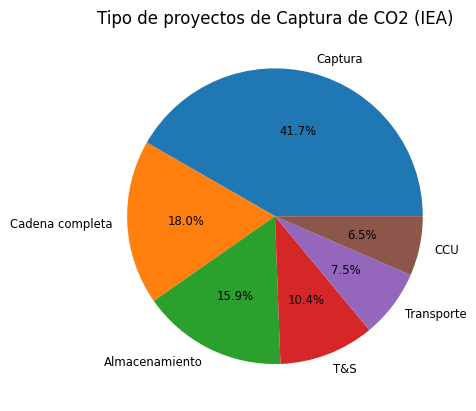

In [ ]:
df_tipo_iea= pd.DataFrame(proyectos_iea.value_counts(subset="Tipo de Proyecto", normalize=True, dropna=False))
perc_tipo_iea= df_tipo_iea.rmul(other=100)
perc_tipo_iea.plot(kind="pie", y="proportion", legend=False, ylabel=" ", title="Tipo de proyectos de Captura de CO2 (IEA)", autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=1 )
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/img2.png")


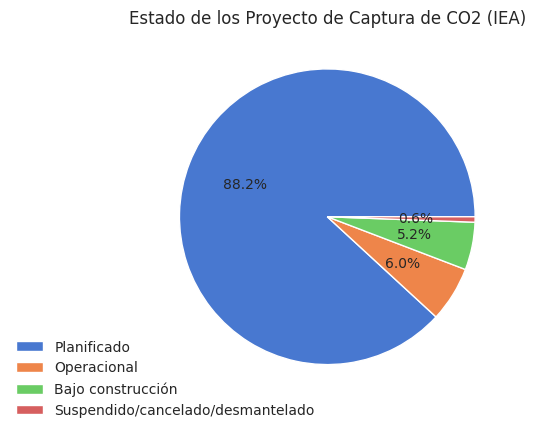

In [ ]:
df_estado_iea= pd.DataFrame(proyectos_iea.value_counts(subset="Estado del Proyecto", normalize=True, dropna=False))
perc_estado_iea= df_estado_iea.rmul(other=100)
perc_estado_iea.plot(kind="pie", y="proportion", legend=True, ylabel=" ",autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=1,labeldistance=None, title="Estado de los Proyecto de Captura de CO2 (IEA)")
plt.legend(loc='best', bbox_to_anchor=(0.5,0.2), ncols=1, framealpha=0,fontsize="small")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/img1.png")

Analisis descriptivo

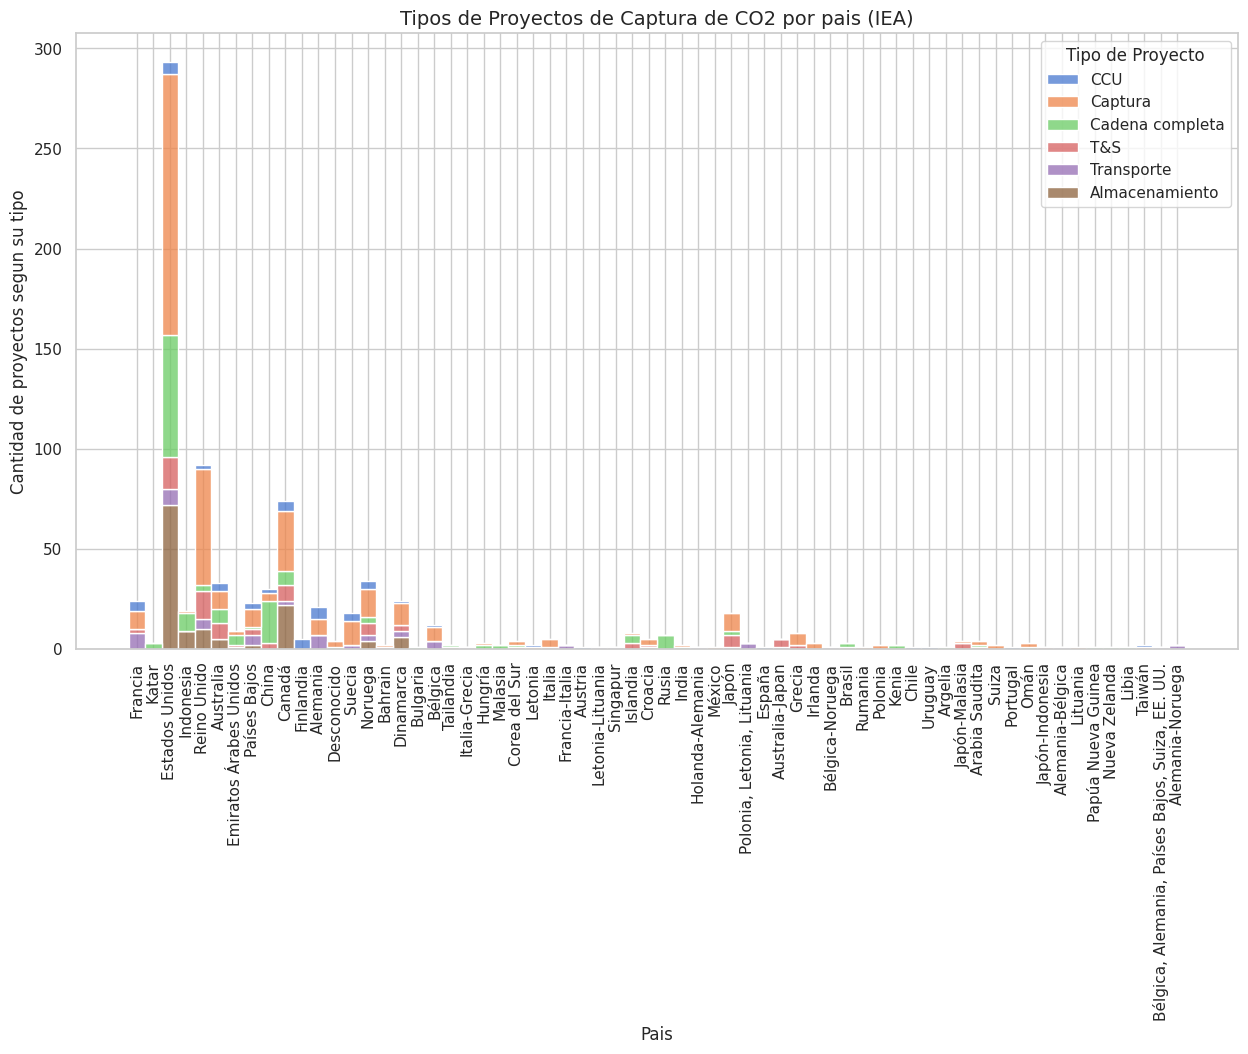

<Figure size 640x480 with 0 Axes>

In [ ]:
n=proyectos_iea["Pais"].unique().tolist()
ind=np.arange(len(n))
plt.figure(figsize=(15,8))
sns.histplot(proyectos_iea, x="Pais", hue="Tipo de Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(ind, n, rotation=90)
plt.xlabel("Pais")
plt.ylabel("Cantidad de proyectos segun su tipo")
plt.title("Tipos de Proyectos de Captura de CO2 por pais (IEA)", fontsize=14)
plt.show()
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Tipo_Dataset2.png")

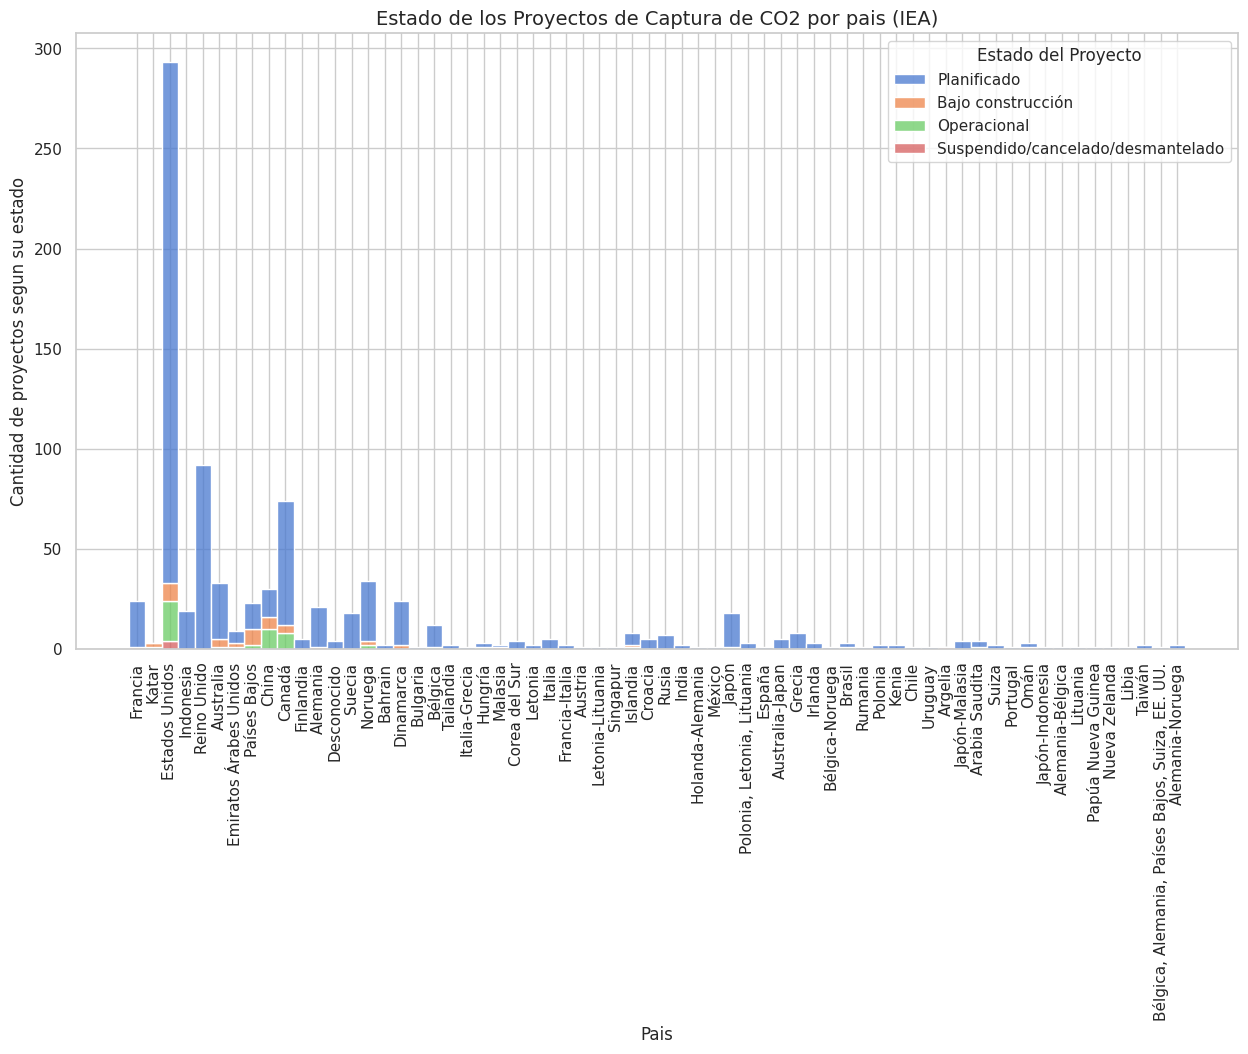

<Figure size 640x480 with 0 Axes>

In [ ]:
p=proyectos_iea["Pais"].unique().tolist()
i=np.arange(len(n))
plt.figure(figsize=(15,8))
sns.histplot(proyectos_iea, x="Pais", hue="Estado del Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(ind, n, rotation=90)
plt.xlabel("Pais")
plt.ylabel("Cantidad de proyectos segun su estado")
plt.title("Estado de los Proyectos de Captura de CO2 por pais (IEA)", fontsize=14)
plt.show()
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Estados_DS2.png")

In [ ]:
estado=proyectos_iea.groupby(["Pais", "Estado del Proyecto"]).size().reset_index()
tipo=proyectos_iea.groupby(["Pais","Tipo de Proyecto"]).size().reset_index()

In [ ]:
#Contamos la cantidad de proyectos por pais
p=proyectos_iea.groupby("Pais").size().reset_index()
p.rename({0:"conteo"}, axis="columns", inplace=True)
t=proyectos_iea.groupby(["Estado del Proyecto","Tipo de Proyecto"]).size()
df_desc=proyectos_iea.groupby(["Pais","Estado del Proyecto","Tipo de Proyecto"]).size().reset_index()


In [ ]:
#Filtramos paises segun el numero de proyecctos para poder visualizar mejor los histogramas
f= p.loc[p["conteo"] >= 30, "Pais"].tolist() #Extraemos los paises con 30 o mas proyectos
g= p.loc[p["conteo"] < 30, "Pais"].tolist() #Extraemos los paises con menos 30 proyectos
df_f=proyectos_iea[proyectos_iea['Pais'].isin(f)] #df_f contiene solo las filas con los paises que están en f
df_g=proyectos_iea[proyectos_iea['Pais'].isin(g)] #df_g contiene solo las filas con los paises que están en g

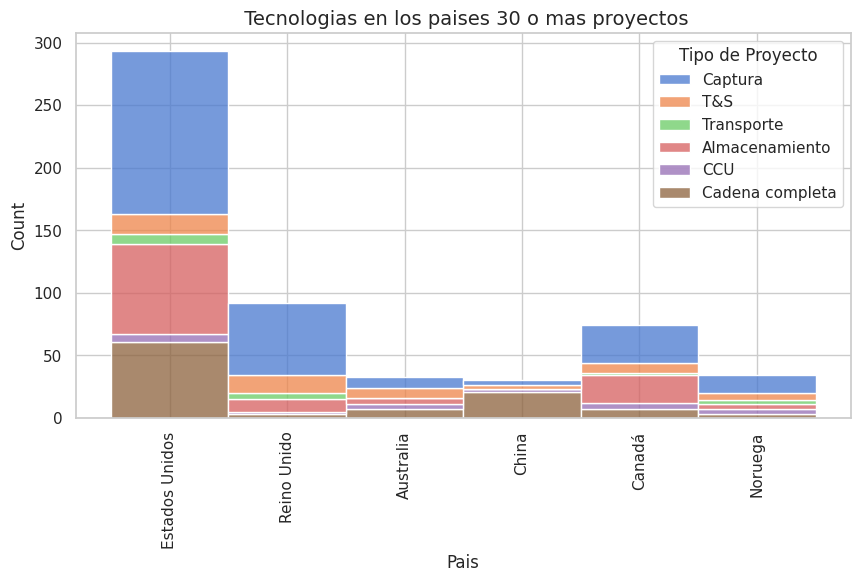

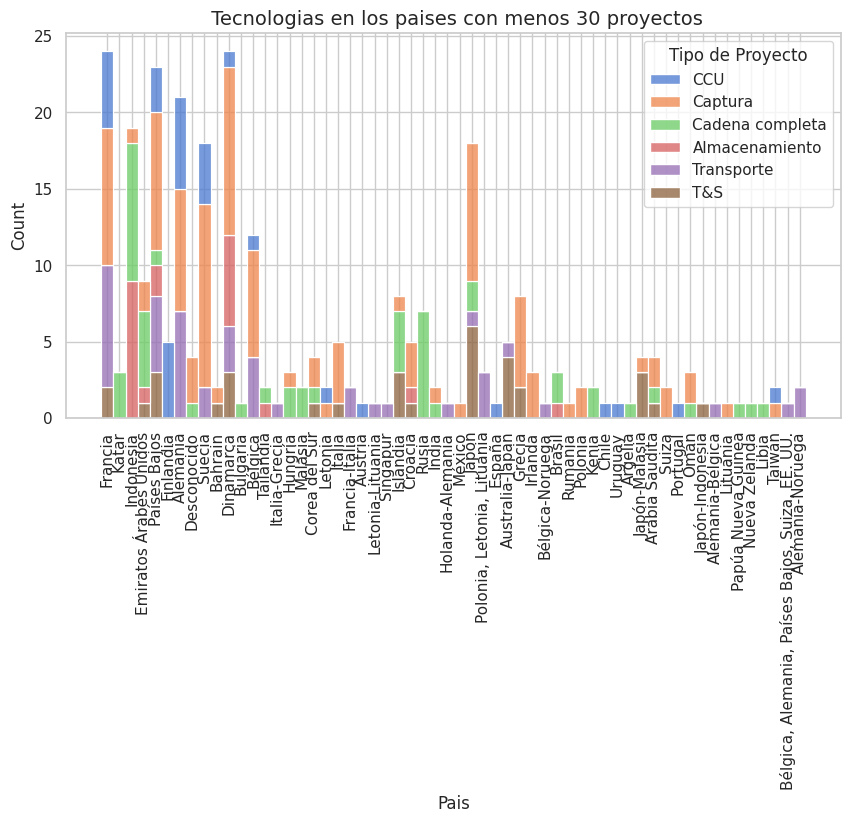

In [ ]:
pf=df_f["Pais"].unique().tolist()
i=np.arange(len(pf))
pg=df_g["Pais"].unique().tolist()
j=np.arange(len(pg))
#Graficamos
plt.figure(figsize=(10,5))
sns.histplot(df_f, x="Pais", hue="Tipo de Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(i, pf, rotation=90)
plt.title(" Tecnologias en los paises 30 o mas proyectos", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Tipo_DS2_1.png")
plt.figure(figsize=(10,5))
sns.histplot(df_g, x="Pais", hue="Tipo de Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(j, pg, rotation=90)
plt.title(" Tecnologias en los paises con menos 30 proyectos", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Tipo_DS2_2.png")


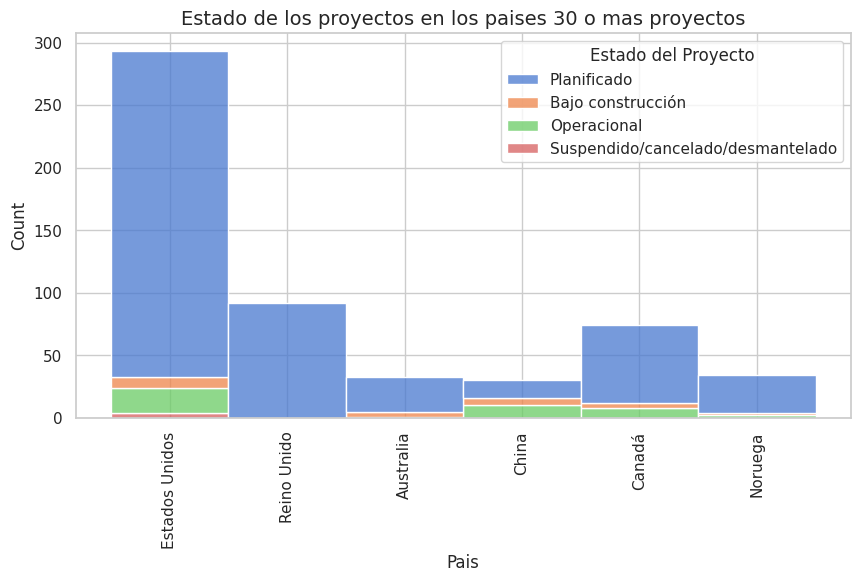

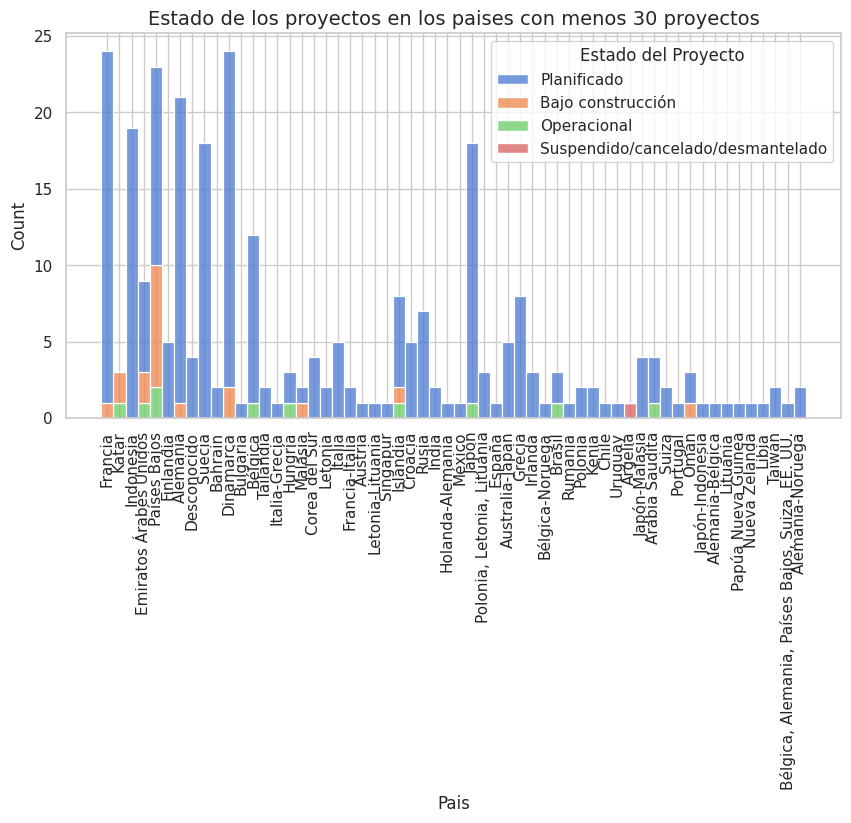

In [ ]:
pf=df_f["Pais"].unique().tolist()
i=np.arange(len(pf))
pg=df_g["Pais"].unique().tolist()
j=np.arange(len(pg))
#Graficamos
plt.figure(figsize=(10,5))
sns.histplot(df_f, x="Pais", hue="Estado del Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(i, pf, rotation=90)
plt.title("Estado de los proyectos en los paises 30 o mas proyectos", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Estado_DS2_1.png")
plt.figure(figsize=(10,5))
sns.histplot(df_g, x="Pais", hue="Estado del Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(j, pg, rotation=90)
plt.title("Estado de los proyectos en los paises con menos 30 proyectos", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Estado_DS2_2.png")

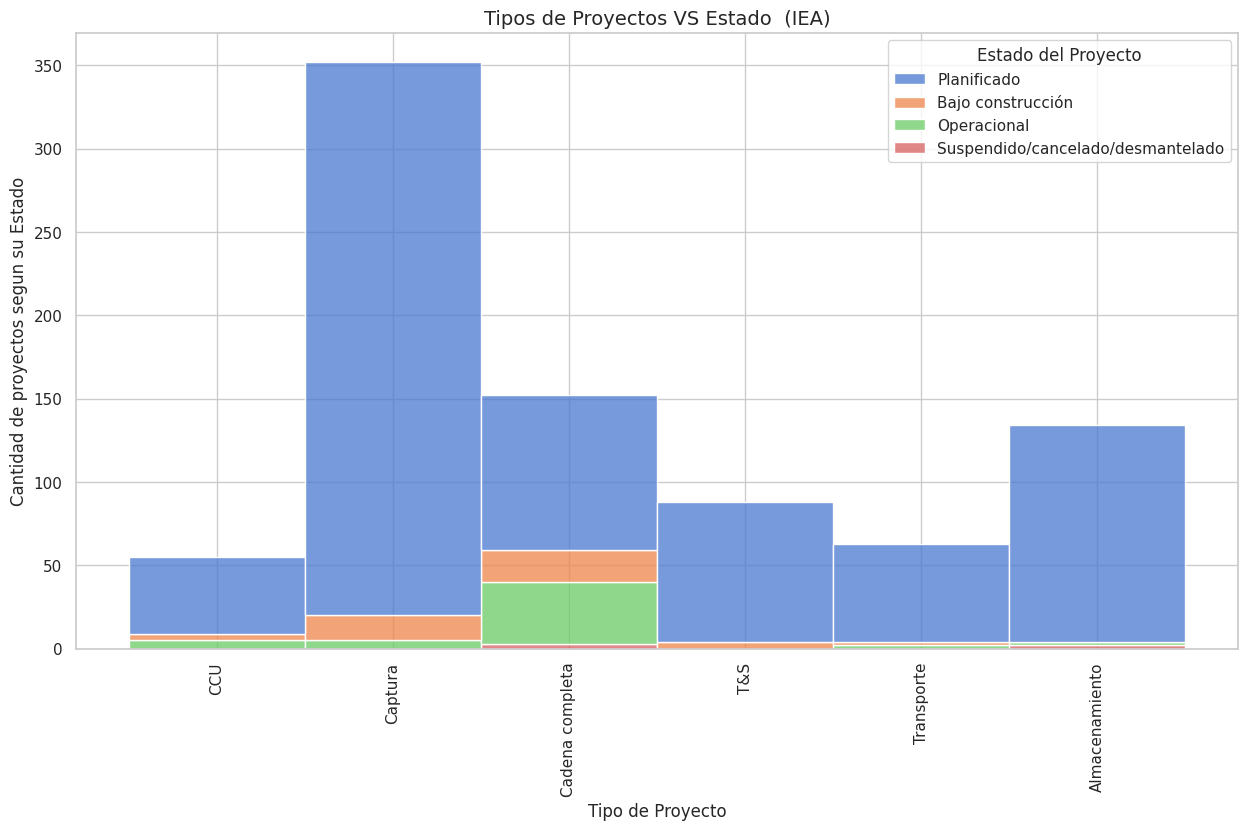

In [ ]:
n=proyectos_iea["Tipo de Proyecto"].unique().tolist()
ind=np.arange(len(n))
plt.figure(figsize=(15,8))
sns.histplot(proyectos_iea, x="Tipo de Proyecto", hue="Estado del Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(ind, n, rotation=90)
plt.xlabel("Tipo de Proyecto")
plt.ylabel("Cantidad de proyectos segun su Estado")
plt.title("Tipos de Proyectos VS Estado  (IEA)", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Tipo_DS2_3.png")

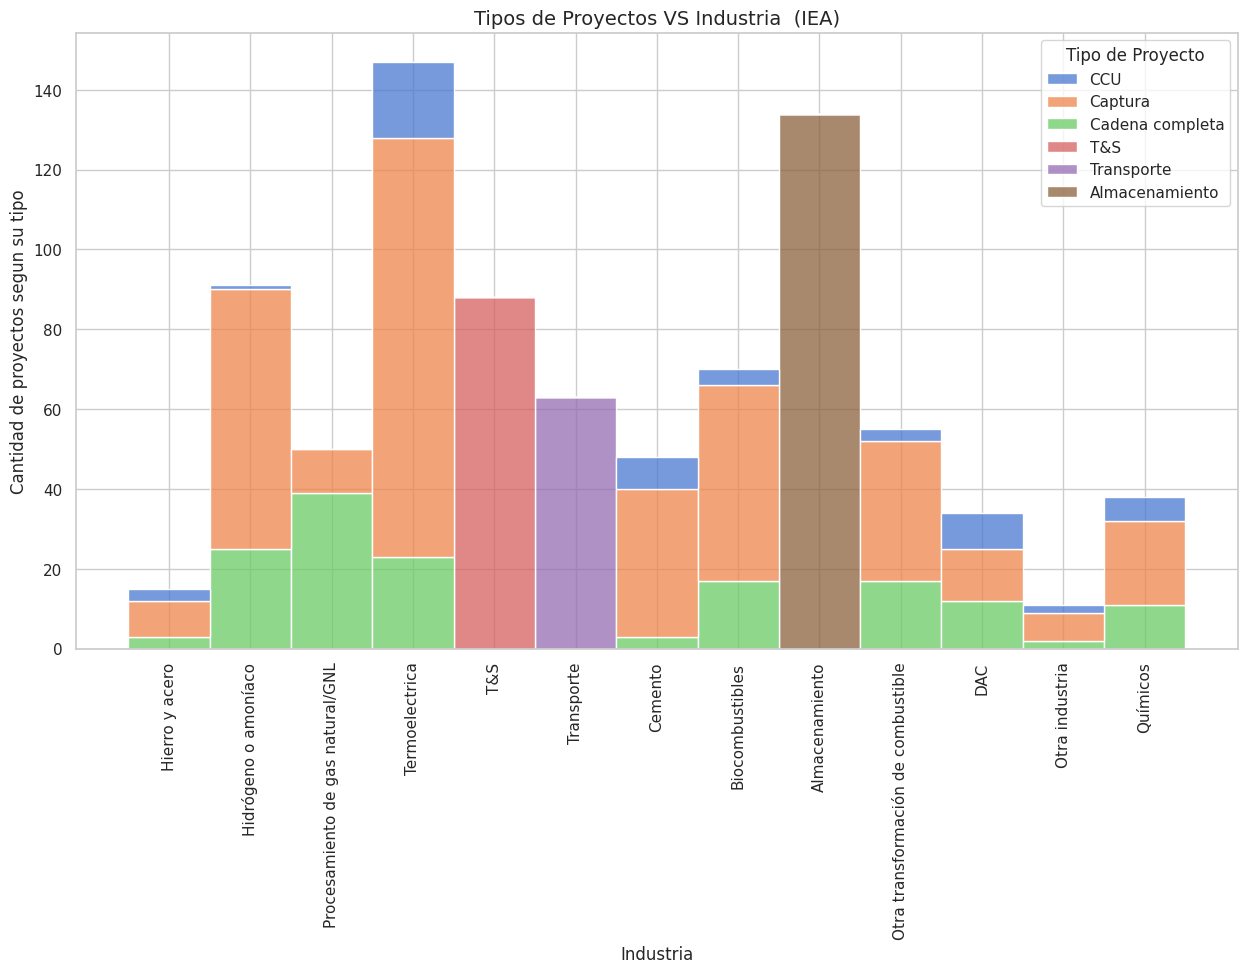

In [ ]:
n=proyectos_iea["Industria"].unique().tolist()
ind=np.arange(len(n))
plt.figure(figsize=(15,8))
sns.histplot(proyectos_iea, x="Industria", hue="Tipo de Proyecto", stat="count", multiple="stack", binwidth=1.5, legend=True)
plt.xticks(ind, n, rotation=90)
plt.xlabel("Industria")
plt.ylabel("Cantidad de proyectos segun su tipo")
plt.title("Tipos de Proyectos VS Industria  (IEA)", fontsize=14)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/Tipo_DS2_4.png")

Sin eliminación de valores atípicos

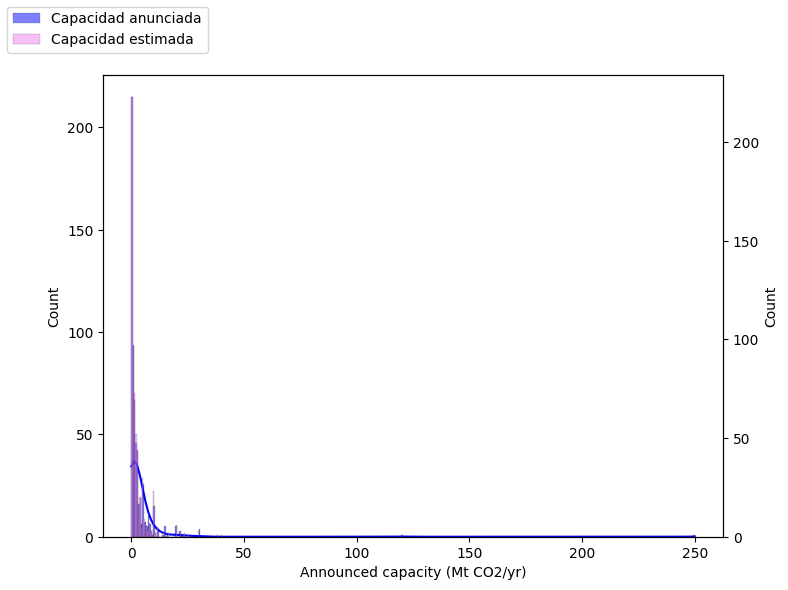

In [ ]:
#histogramas para las variables numericas Capacidad Anunciada y Capacidad estimada por la IEA
fig, ax1= plt.subplots(figsize=[8,6]) #Ajustar el tamaño de la grafica
##Determinamos el tipo de grafico
sns.histplot(proyectos_iea['Announced capacity (Mt CO2/yr)'], kde=True, color="blue", label="Capacidad anunciada", ax=ax1, alpha=0.5 )
ax2=ax1.twinx()
sns.histplot(proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'], kde=False, color="violet", label="Capacidad estimada", ax=ax2, alpha=0.5)
fig.legend(loc="upper left")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/hist_DS2.png")

***Estadisticos de capacidad de captura por Industria y Por País***

Comportamiento de la capacidad de captura por pais

Comportamiento de la capacidad de captura por industria

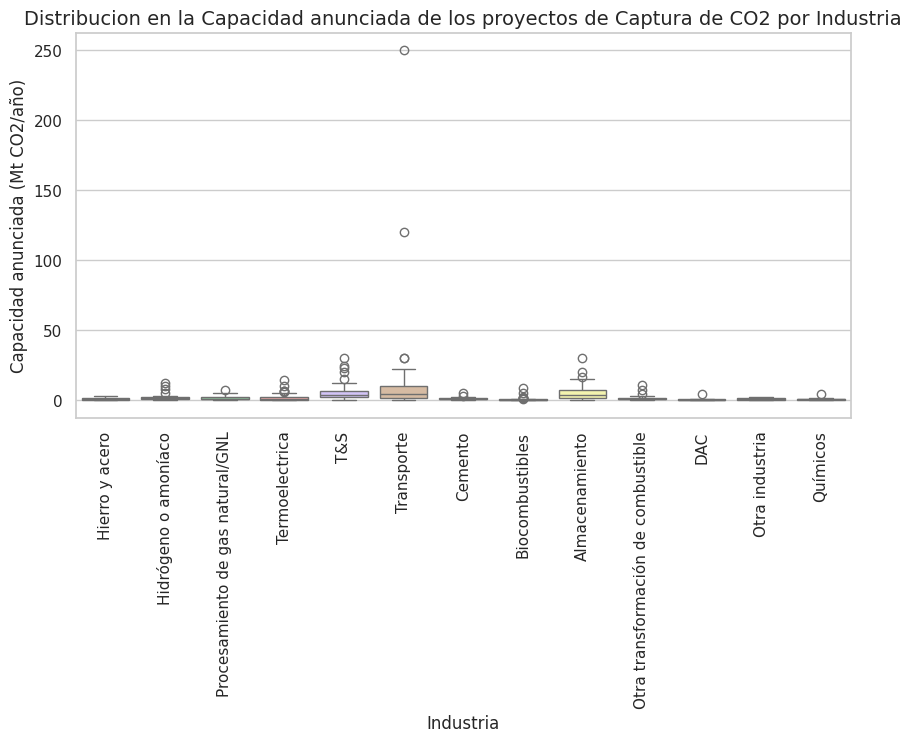

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Industria'], y=proyectos_iea['Announced capacity (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad anunciada de los proyectos de Captura de CO2 por Industria', fontsize=14)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Capacidad anunciada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_1_2.png", bbox_inches="tight")


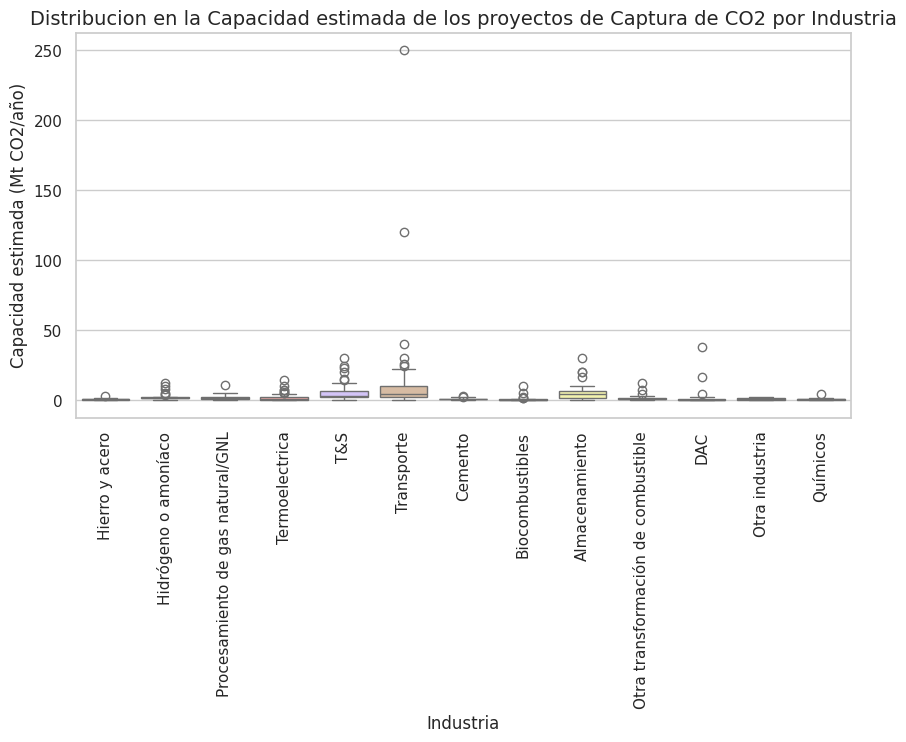

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Industria'], y=proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad estimada de los proyectos de Captura de CO2 por Industria', fontsize=14)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Capacidad estimada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_2_2.png", bbox_inches="tight")


In [ ]:
##Matriz de covarianza para las variables númericas
proyectos_iea.cov(numeric_only=True)

Announced capacity (Mt CO2/yr)  \
Announced capacity (Mt CO2/yr)                             141.264770   
Estimated capacity by IEA (Mt CO2/yr)                      144.519753   

                                       Estimated capacity by IEA (Mt CO2/yr)  
Announced capacity (Mt CO2/yr)                                    144.519753  
Estimated capacity by IEA (Mt CO2/yr)                             138.466364

Con eliminación de valores atípicos

In [ ]:
##Eliminamos outlayers
x=proyectos_iea.loc[proyectos_iea["Estimated capacity by IEA (Mt CO2/yr)"] > 50].index.tolist()
proyectos_iea.drop(axis=0, index=x, inplace=True)


In [ ]:
##Calculamos los estadisticos descriptivos luego de la eliminacion de valores atipicos
proyectos_iea.describe()

Announcement                            FID  \
count                            822                            255   
mean   2020-10-26 00:56:03.503649536  2022-11-06 03:34:35.294117632   
min              1982-01-01 00:00:00            1984-01-01 00:00:00   
25%              2021-01-01 00:00:00            2023-01-01 00:00:00   
50%              2022-01-01 00:00:00            2024-01-01 00:00:00   
75%              2023-01-01 00:00:00            2024-01-01 00:00:00   
max              2024-01-01 00:00:00            2029-01-01 00:00:00   
std                              NaN                            NaN   

                           Operation Suspension/decommissioning  \
count                            553                          6   
mean   2026-03-05 22:47:05.316455680        2017-09-01 04:00:00   
min              1972-01-01 00:00:00        2004-01-01 00:00:00   
25%              2025-01-01 00:00:00        2012-07-02 00:00:00   
50%              2027-01-01 00:00:00        2020-01-01 12:00:00   
75%              2029-01-01 00:00:00        2024-07-02 06:00:00   
max              2040-01-01 00:00:00        2026-01-01 00:00:00   
std                              NaN                        NaN   

       Announced capacity (Mt CO2/yr)  Estimated capacity by IEA (Mt CO2/yr)  
count                      612.000000                             643.000000  
mean                         2.796284                               2.885266  
min                          0.000000                               0.001000  
25%                          0.400000                               0.400000  
50%                          1.200000                               1.270000  
75%                          3.000000                               3.000000  
max                         30.000000                              40.000000  
std                          4.425264                               4.768221

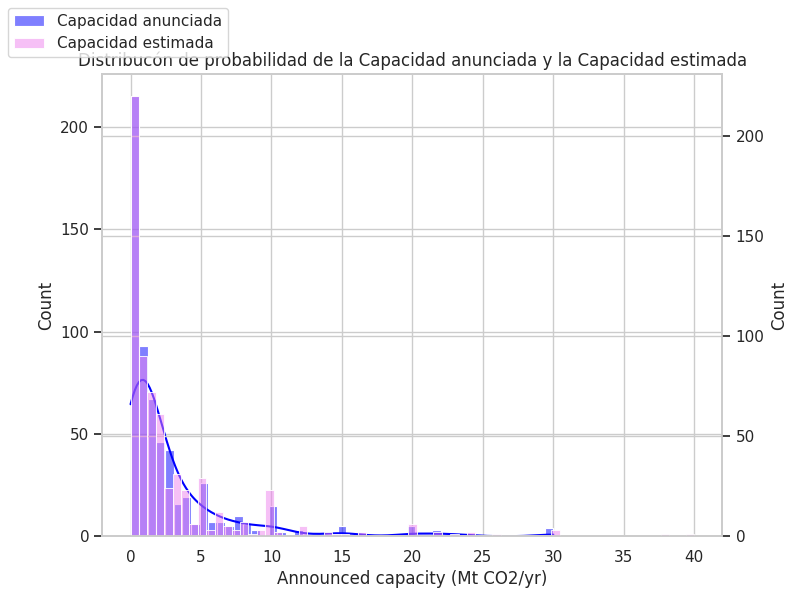

In [ ]:
#histogramas para las variables numericas Capacidad Anunciada y Capacidad estimada por la IEA
fig, ax1= plt.subplots(figsize=[8,6]) #Ajustar el tamaño de la grafica
##Determinamos el tipo de grafico
sns.histplot(proyectos_iea['Announced capacity (Mt CO2/yr)'], kde=True, color="blue", label="Capacidad anunciada", ax=ax1, alpha=0.5 )
ax2=ax1.twinx()
sns.histplot(proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'], kde=False, color="violet", label="Capacidad estimada", ax=ax2, alpha=0.5)
fig.legend(loc="upper left")
plt.title("Distribucón de probabilidad de la Capacidad anunciada y la Capacidad estimada")
plt.xlabel("Capacidad de Captura (Mt CO2)")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/hist_DS2.png")

Comportamiento de la capacidad de captura por Industria y por País

In [ ]:
##Calculamos los estadisticos promedio y desviacion estandar en dataframes separados
df_mean_AC=proyectos_iea.groupby(["Pais","Industria",])["Announced capacity (Mt CO2/yr)"].mean().reset_index() #Promedio de la capacidad anuciada agrupada por país es industria
df_mean_EC=proyectos_iea.groupby(["Pais","Industria",])["Estimated capacity by IEA (Mt CO2/yr)"].mean().reset_index()  #Promedio de la capacidad estimada agrupada por país es industria
df_std_AC=proyectos_iea.groupby(["Pais","Industria",])["Announced capacity (Mt CO2/yr)"].std().reset_index()  #Desviación estándar de la capacidad anuciada agrupada por país es industria
df_std_EC=proyectos_iea.groupby(["Pais","Industria",])["Estimated capacity by IEA (Mt CO2/yr)"].std().reset_index()  #Desviación estándar de la capacidad estimada agrupada por país es industria
##Eliminamos nulos
df_mean_AC=df_mean_AC.dropna()
df_mean_EC=df_mean_EC.dropna()
df_std_AC=df_std_AC.dropna()
df_std_EC=df_std_EC.dropna()

Comportamiento de la capacidad de captura por País

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Pais'], y=proyectos_iea['Announced capacity (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad anunciada de los proyectos de Captura de CO2 por pais', fontsize=14)
plt.xlabel('Pais', fontsize=12)
plt.ylabel('Capacidad anunciada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_1.png", bbox_inches='tight')


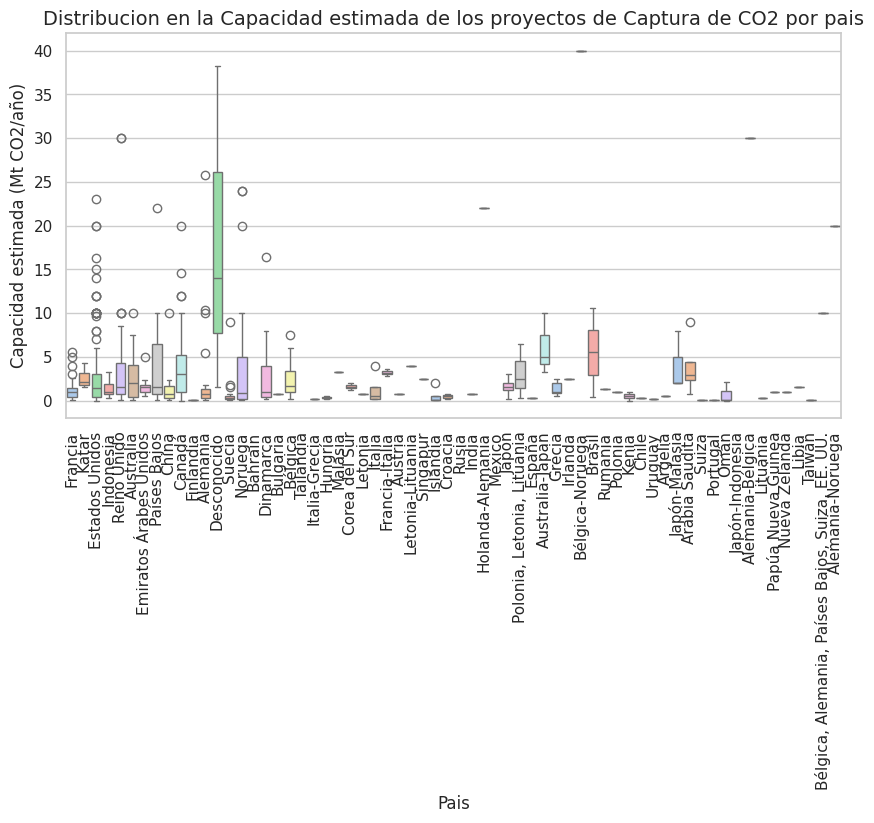

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Pais'], y=proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad estimada de los proyectos de Captura de CO2 por pais', fontsize=14)
plt.xlabel('Pais', fontsize=12)
plt.ylabel('Capacidad estimada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_2.png", bbox_inches="tight")

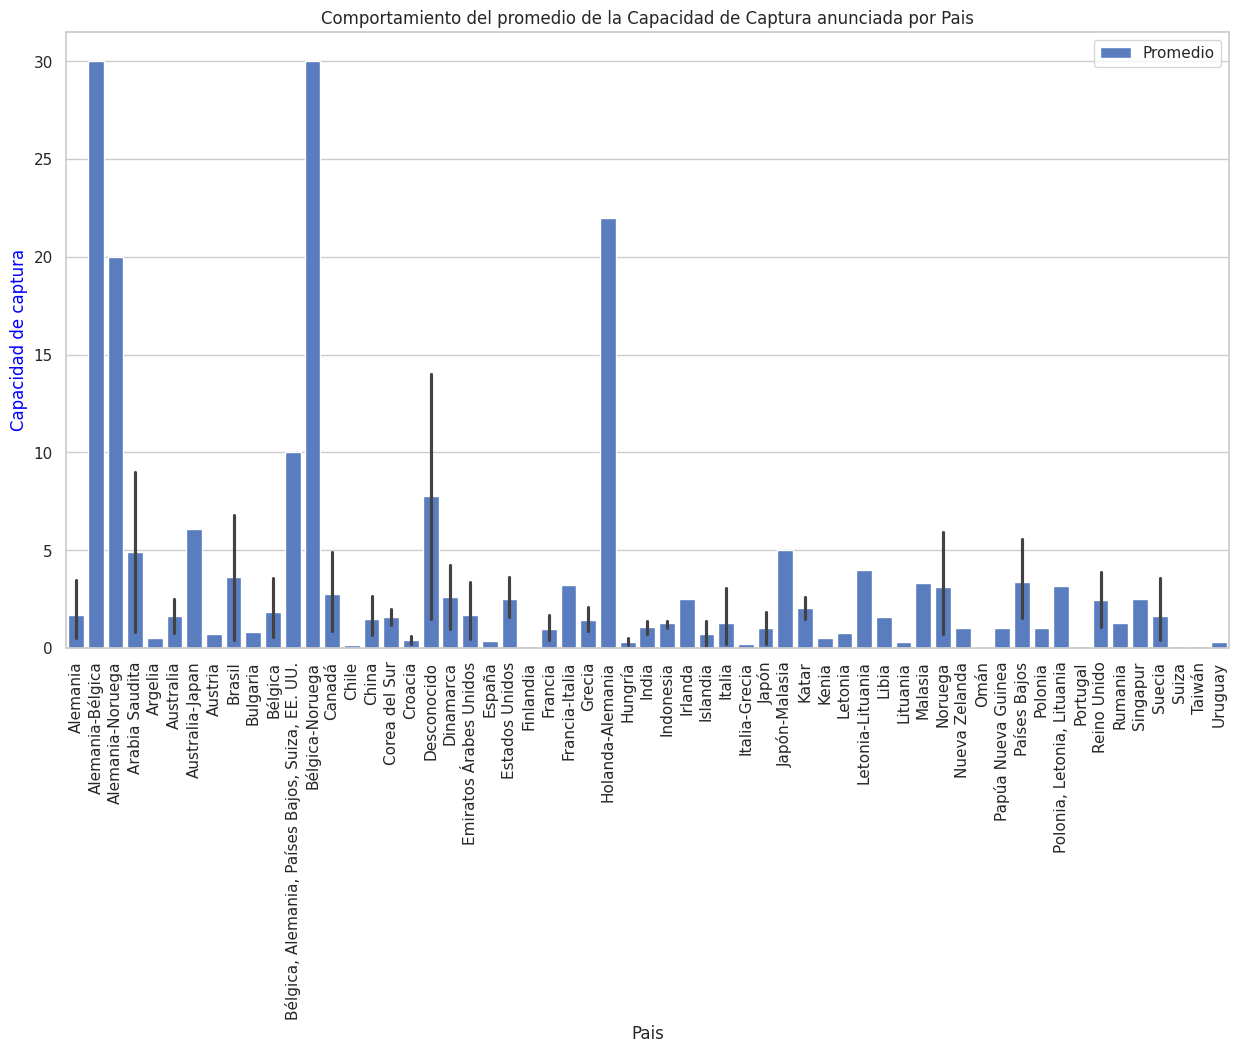

In [ ]:
#Configurar el grafico
plt.plot(figsize=[15,8]) #Ajustar el tamaño de la grafica
#Grafico de barras
sns.barplot(x="Pais", y='Announced capacity (Mt CO2/yr)', data=df_mean_AC, label="Promedio")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.title("Comportamiento del promedio de la Capacidad de Captura anunciada por Pais")
plt.gcf().set_size_inches(15,8)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_mean_DS2_1_1.png", bbox_inches="tight")

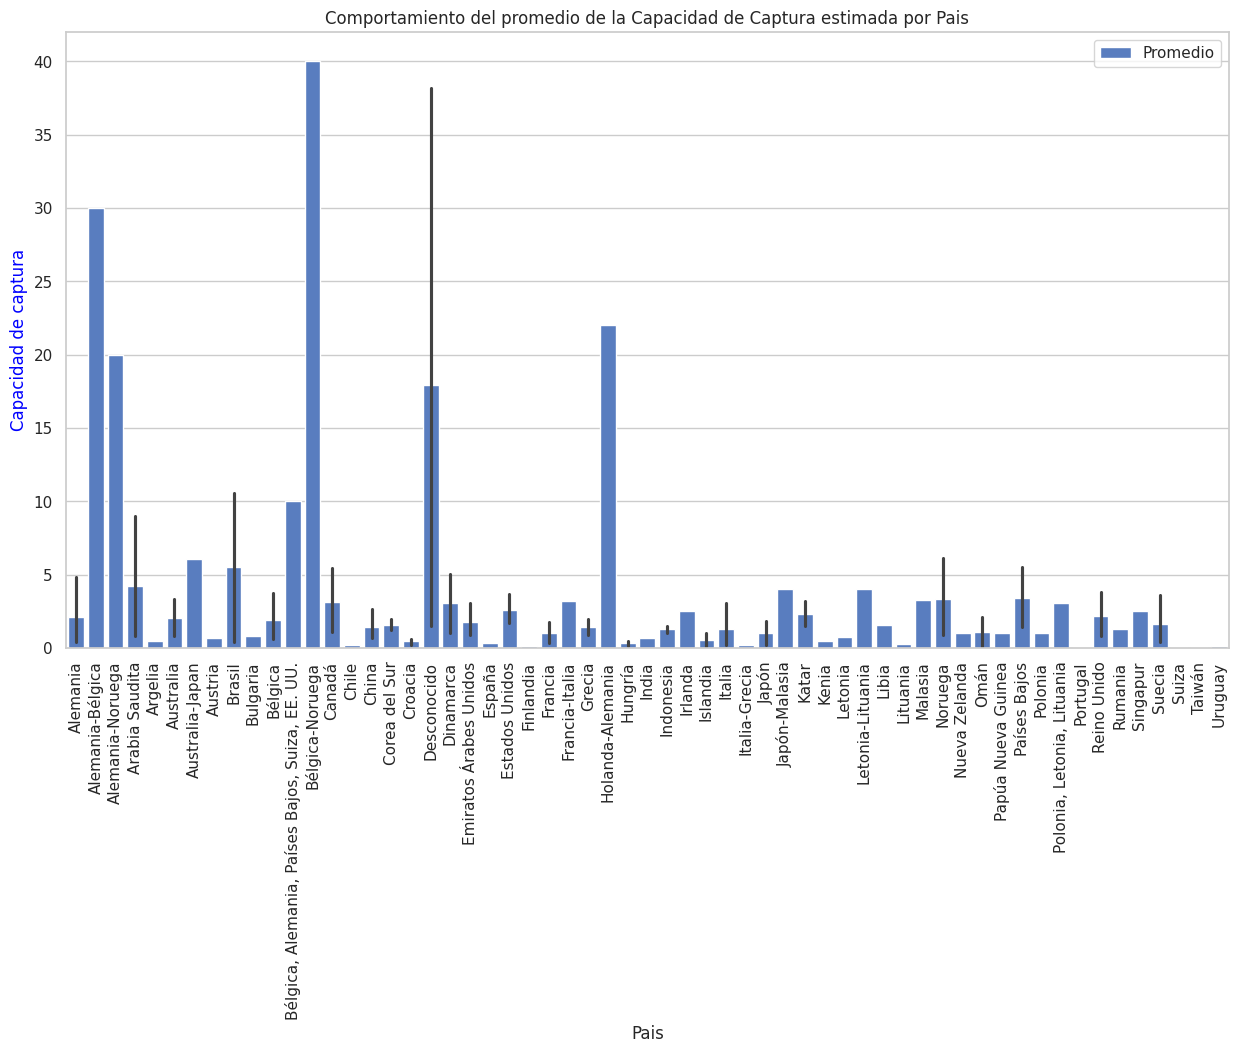

In [ ]:
#Configurar el grafico
plt.plot(figsize=[15,8]) #Ajustar el tamaño de la grafica
#Grafico de barras
sns.barplot(x="Pais", y='Estimated capacity by IEA (Mt CO2/yr)', data=df_mean_EC, label="Promedio")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,8)
plt.title("Comportamiento del promedio de la Capacidad de Captura estimada por Pais")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_mean_DS2_1_2.png", bbox_inches="tight")

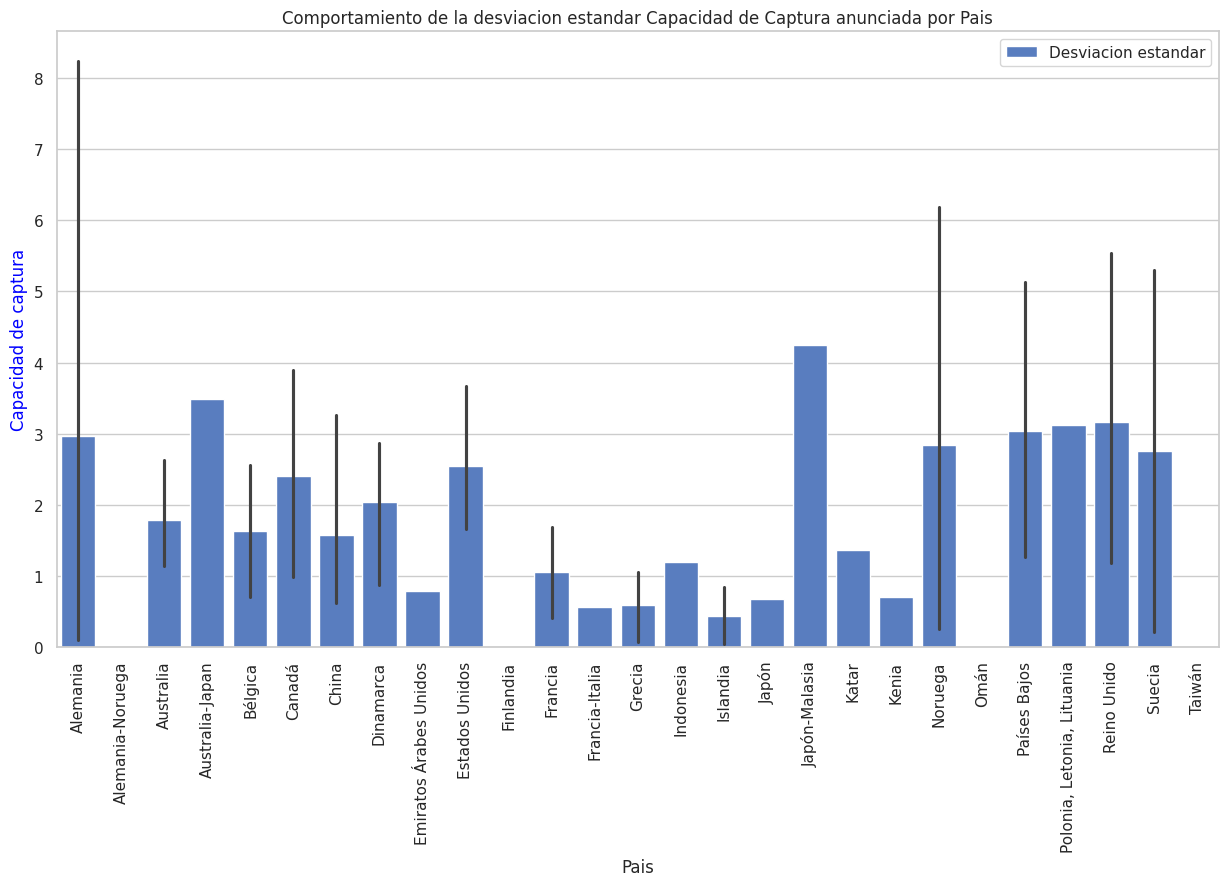

In [ ]:
plt.plot(figsize=[15,8]) #Ajustar el tamaño de la grafica
sns.barplot(x="Pais", y="Announced capacity (Mt CO2/yr)", data=df_std_AC, label="Desviacion estandar")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.title("Comportamiento de la desviacion estandar Capacidad de Captura anunciada por Pais")
plt.gcf().set_size_inches(15,8)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_std_DS2_1_1.png")

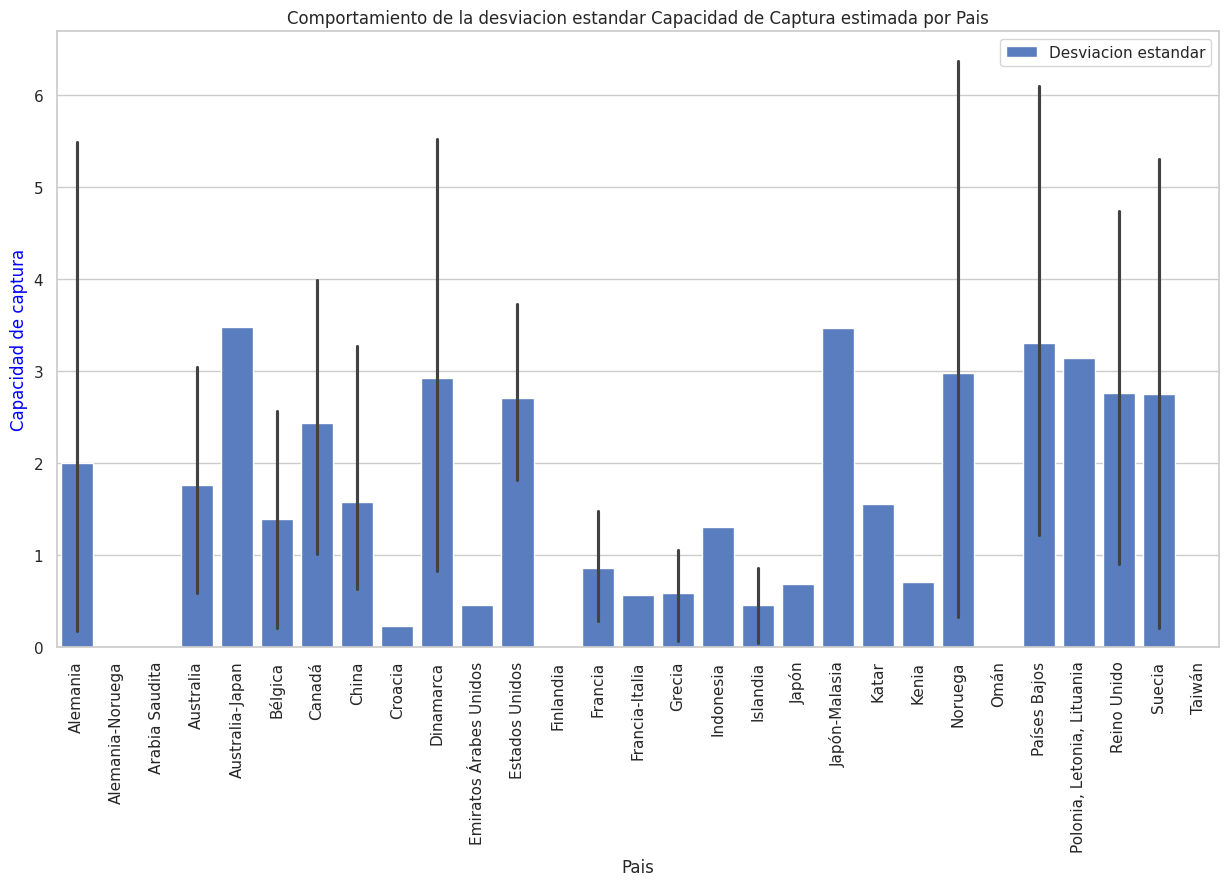

In [ ]:
plt.figure(figsize=[15,8])
sns.barplot(x="Pais", y="Estimated capacity by IEA (Mt CO2/yr)", data=df_std_EC, label="Desviacion estandar")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.title("Comportamiento de la desviacion estandar Capacidad de Captura estimada por Pais")
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_std_DS2_1_2.png")

Comportamiento de la capacidad de captura por industria

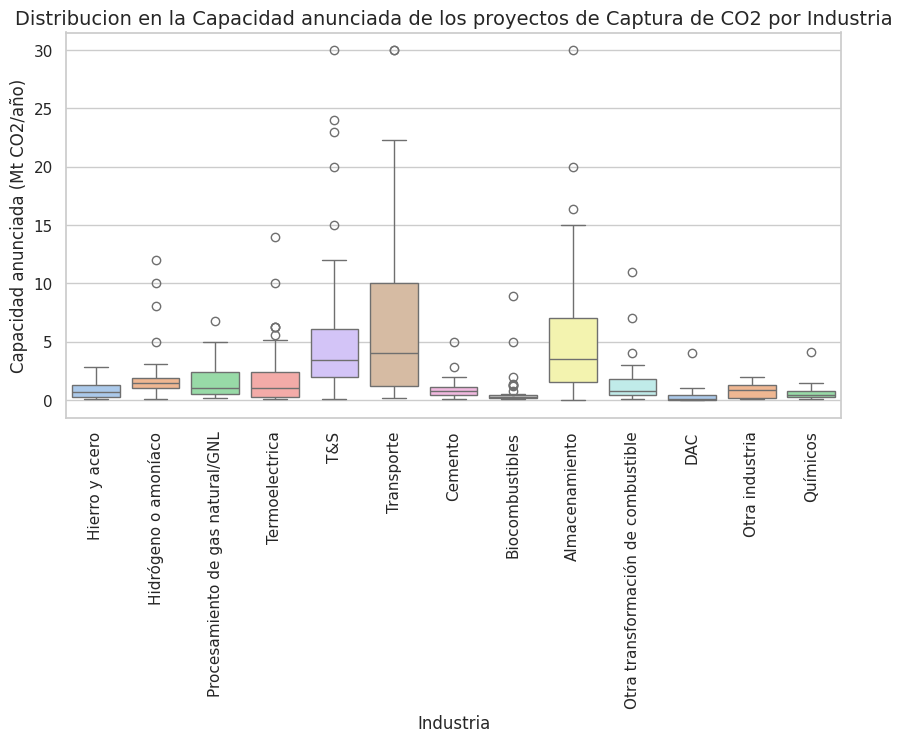

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Industria'], y=proyectos_iea['Announced capacity (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad anunciada de los proyectos de Captura de CO2 por Industria', fontsize=14)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Capacidad anunciada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_1_2.png", bbox_inches="tight")


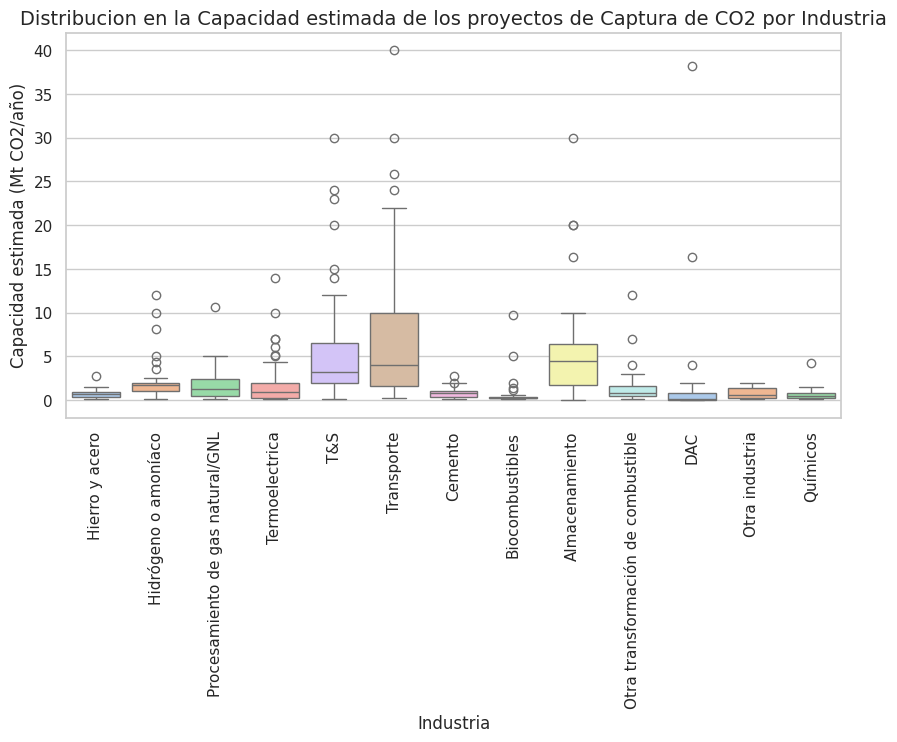

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=proyectos_iea['Industria'], y=proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'], palette="pastel")
plt.title('Distribucion en la Capacidad estimada de los proyectos de Captura de CO2 por Industria', fontsize=14)
plt.xlabel('Industria', fontsize=12)
plt.ylabel('Capacidad estimada (Mt CO2/año)', fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/boxplot_DS2_2_2.png", bbox_inches="tight")


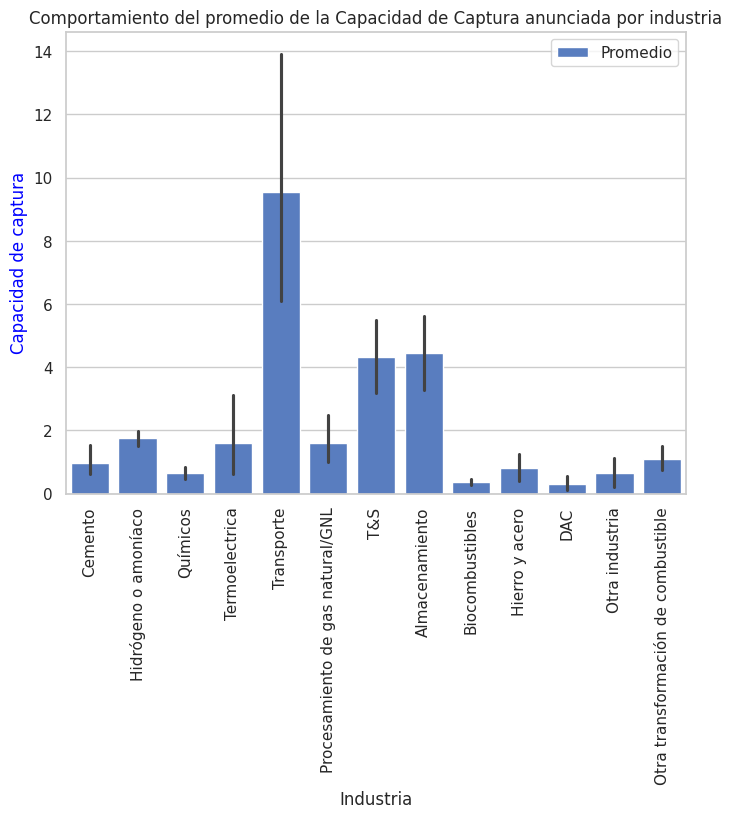

In [ ]:
#Configurar el grafico
plt.plot(figsize=[8,6]) #Ajustar el tamaño de la grafica
#Grafico de barras
sns.barplot(x="Industria", y='Announced capacity (Mt CO2/yr)', data=df_mean_AC, label="Promedio")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.title("Comportamiento del promedio de la Capacidad de Captura anunciada por industria")
plt.gcf().set_size_inches(8,6)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_mean_DS2_2_1.png",bbox_inches="tight")

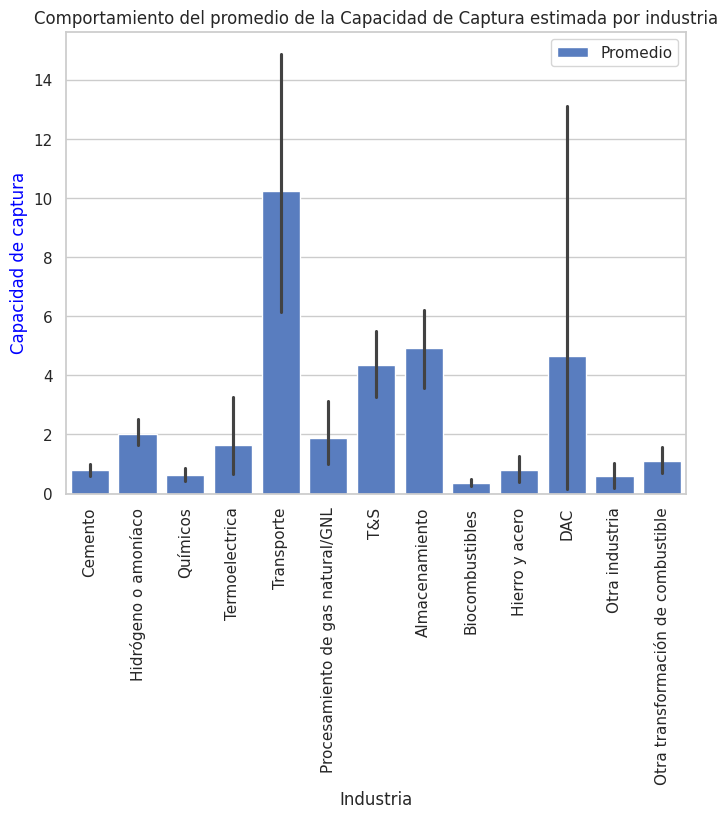

In [ ]:
#Configurar el grafico
plt.plot(figsize=[8,6]) #Ajustar el tamaño de la grafica
#Grafico de barras
sns.barplot(x="Industria", y='Estimated capacity by IEA (Mt CO2/yr)', data=df_mean_EC, label="Promedio")
plt.ylabel("Capacidad de captura", color="blue")
plt.xticks(rotation=90)
plt.title("Comportamiento del promedio de la Capacidad de Captura estimada por industria")
plt.gcf().set_size_inches(8,6)
plt.savefig(fname="/content/drive/MyDrive/Energytalentotech/Dataset_2/barplot_mean_DS2_2_2.png",bbox_inches="tight")

Series de Tiempo

Text(0, 0.5, 'N° de Proyectos')

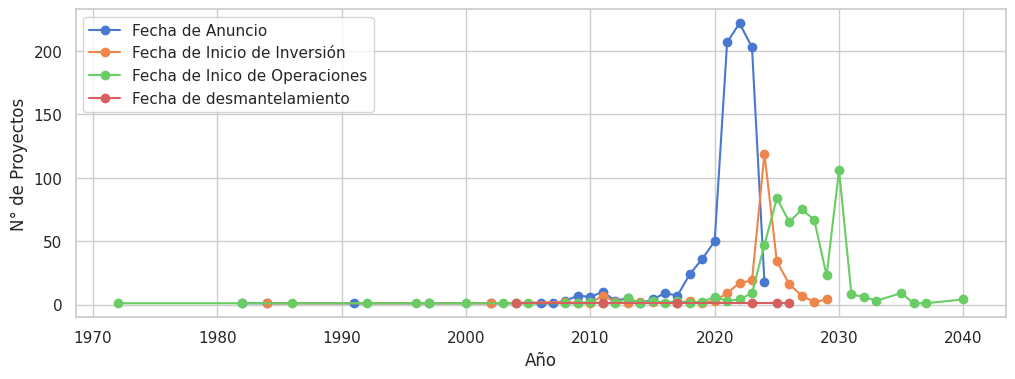

In [ ]:
##Series de tiempo
fig, axs = plt.subplots(figsize=(12, 4))
proyectos_iea.groupby(proyectos_iea["Announcement"].dt.year).size().plot(
    style="-o", rot=0, ax=axs, label="Fecha de Anuncio")
proyectos_iea.groupby(proyectos_iea["FID"].dt.year).size().plot(
    style="-o", rot=0, ax=axs, label="Fecha de Inicio de Inversión")
proyectos_iea.groupby(proyectos_iea["Operation"].dt.year).size().plot(
    style="-o", rot=0, ax=axs, label="Fecha de Inico de Operaciones")
proyectos_iea.groupby(proyectos_iea["Suspension/decommissioning"].dt.year).size().plot(
    style="-o", rot=0, ax=axs, label="Fecha de desmantelamiento")
plt.legend()
plt.xlabel("Año")
plt.ylabel("N° de Proyectos")


Text(0, 0.5, 'N° de Proyectos')

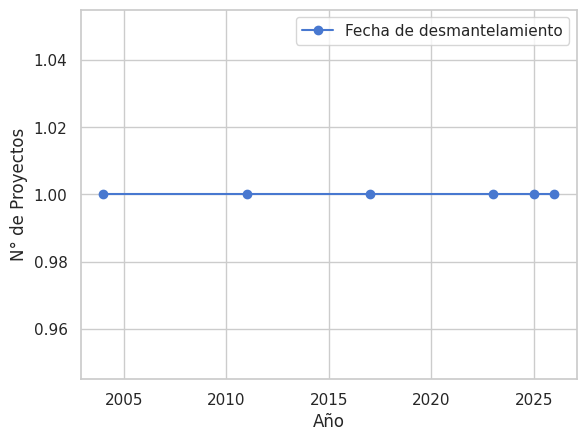

In [ ]:
proyectos_iea.groupby(proyectos_iea["Suspension/decommissioning"].dt.year).size().plot(
    style="-o", rot=0, label="Fecha de desmantelamiento")
plt.legend()
plt.xlabel("Año")
plt.ylabel("N° de Proyectos")

In [ ]:
##Extraemo los proyectos con fecha de cancelación
decom=proyectos_iea.dropna(subset=["Suspension/decommissioning"])

In [ ]:
decom

Project name        Country  \
433                Illinois Basin Decatur Project (IL)  United States   
437                                           In Salah        Algeria   
462                            Kemper county CCUS (MS)  United States   
585                                        Olso Celsio         Norway   
617                     Petra Nova Carbon Capture (TX)  United States   
726  Shell Netherlands Refineries heavy residue gas...    Netherlands   

                                              Partners Project type  \
433   ADM, Midwest Geological Sequestration Consortium   Full Chain   
437                             bp, Sonatrach, Equinor   Full Chain   
462               Mississippi Power (Southern Company)   Full Chain   
585  Hafslund Oslo Celsio (formerly Fortum Oslo Var...      Capture   
617  Equity: NRG and JX Nippon, Debt: JBIC & Mizhou...   Full Chain   
726                                              Shell          CCU   

    Announcement        FID  Operation Suspension/decommissioning  \
433   2009-01-01 2011-01-01 2011-01-01                 2011-01-01   
437          NaT        NaT 2004-01-01                 2004-01-01   
462          NaT 2010-01-01 2017-01-01                 2017-01-01   
585   2016-01-01        NaT 2025-01-01                 2025-01-01   
617   2009-01-01 2014-01-01 2023-01-01                 2023-01-01   
726          NaT        NaT 1997-01-01                 2026-01-01   

                         Project Status  Announced capacity (Mt CO2/yr)  \
433  Suspended/cancelled/decommissioned                            0.33   
437  Suspended/cancelled/decommissioned                            0.50   
462  Suspended/cancelled/decommissioned                            3.00   
585                             Planned                            0.40   
617                         Operational                            1.40   
726                         Operational                            0.75   

     Estimated capacity by IEA (Mt CO2/yr)                      Sector  \
433                                   0.33                    Biofuels   
437                                   0.50  Natural gas processing/LNG   
462                                   3.00              Power and heat   
585                                   0.40              Power and heat   
617                                   1.40              Power and heat   
726                                   0.75   Other fuel transformation   

        Fate of carbon                Estado del Proyecto Tipo de Proyecto  \
433  Dedicated storage  Suspendido/cancelado/desmantelado  Cadena completa   
437  Dedicated storage  Suspendido/cancelado/desmantelado  Cadena completa   
462                EOR  Suspendido/cancelado/desmantelado  Cadena completa   
585  Dedicated storage                        Planificado          Captura   
617                EOR                        Operacional  Cadena completa   
726                Use                        Operacional              CCU   

               Pais                           Industria  
433  Estados Unidos                     Biocombustibles  
437         Argelia    Procesamiento de gas natural/GNL  
462  Estados Unidos                      Termoelectrica  
585         Noruega                      Termoelectrica  
617  Estados Unidos                      Termoelectrica  
726    Países Bajos  Otra transformación de combustible

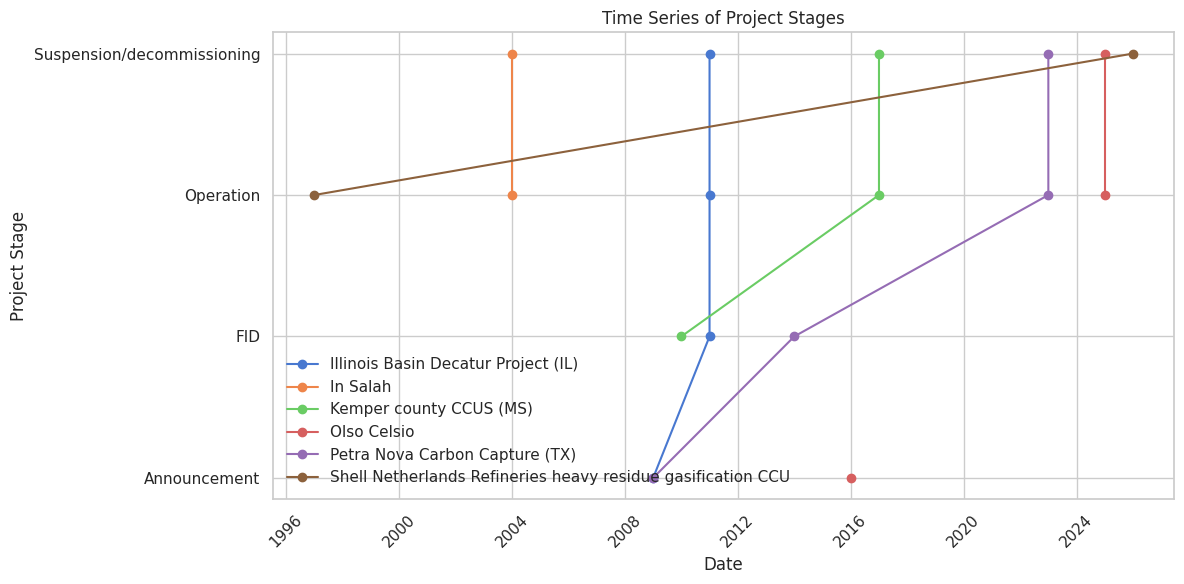

In [ ]:
# prompt: Con DataFrame decom: serie de tiempo con la progresión de los estados de cada proyect
# Extract datecolumns
date_columns = ['Announcement', 'FID', 'Operation', 'Suspension/decommissioning']

# Create a long-format DataFrame for plotting
decom_long = pd.melt(decom, id_vars='Project name',
                    value_vars=date_columns, var_name='Stage', value_name='Date')


# Create the time series plot
plt.figure(figsize=(12, 6))
for project in decom['Project name'].unique():
    project_data = decom_long[decom_long['Project name'] == project]
    plt.plot(project_data['Date'], project_data['Stage'], marker='o', label=project)

plt.xlabel('Date')
plt.ylabel('Project Stage')
plt.title('Time Series of Project Stages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="lower left", framealpha=0)
plt.show()


PCA dataset 2

In [ ]:
#Media de la variable "Announced capacity (Mt CO2/yr)"
m_a=proyectos_iea['Announced capacity (Mt CO2/yr)'].mean(axis=0)
#Media de la variable "Estimated capacity by IEA (Mt CO2/yr)"
m_e=proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'].mean(axis=0)
#Varianza de la variable "Announced capacity (Mt CO2/yr)"
var_a=proyectos_iea['Announced capacity (Mt CO2/yr)'].var(axis=0)
#Varianza de la variable "Estimated capacity by IEA (Mt CO2/yr)"
var_e=proyectos_iea['Estimated capacity by IEA (Mt CO2/yr)'].var(axis=0)
print("promedio de Capacidad anunciada, Varianza de capacidad anunciada;", [m_a, var_a])
print("promedio de Capacidad estimada, Varianza de Capacidad estimada: ", [m_e, var_e])

promedio de Capacidad anunciada, Varianza de capacidad anunciada; [np.float64(2.79628431372549), 19.58296361461439]
promedio de Capacidad estimada, Varianza de Capacidad estimada:  [np.float64(2.885265940902022), 22.735927002373984]


In [ ]:
##Matriz de covarianza para las variables númericas
proyectos_iea.cov(numeric_only=True)

Announced capacity (Mt CO2/yr)  \
Announced capacity (Mt CO2/yr)                              19.582964   
Estimated capacity by IEA (Mt CO2/yr)                       20.067968   

                                       Estimated capacity by IEA (Mt CO2/yr)  
Announced capacity (Mt CO2/yr)                                     20.067968  
Estimated capacity by IEA (Mt CO2/yr)                              22.735927

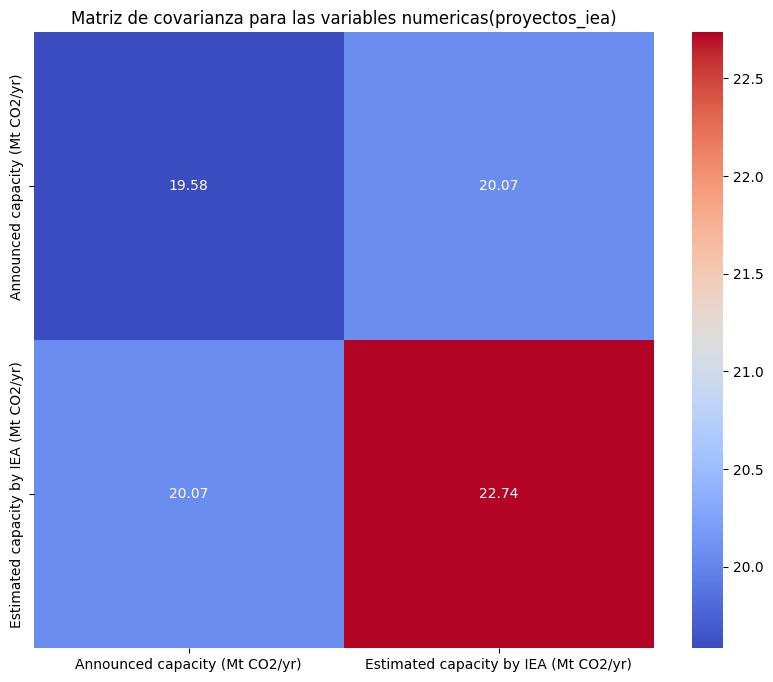

In [ ]:

# Select only numeric columns for the covariance matrix
numeric_cols = proyectos_iea.select_dtypes(include=['number'])

# Calculate the covariance matrix
cov_matrix = numeric_cols.cov()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de covarianza para las variables numericas(proyectos_iea)')
plt.show()


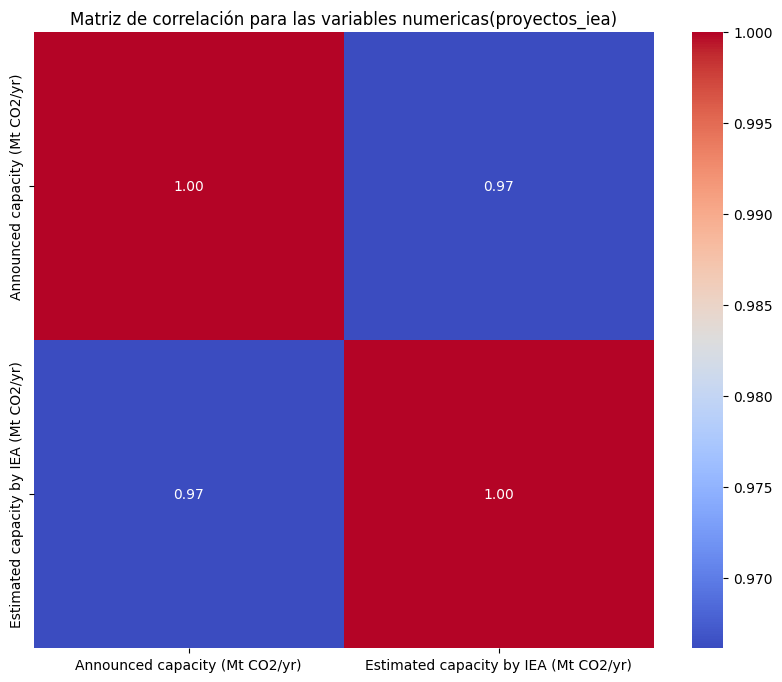

In [ ]:
# Calculate the corr matrix
corr_matrix = numeric_cols.corr(method='pearson')
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación para las variables numericas(proyectos_iea)')
plt.show()

In [ ]:
pet_c=pd.read_csv("/content/drive/MyDrive/Energytalentotech/Dataset_2/value-of-fossil-fuel-subsidies-by-fuel-in-the-top-25-countries-2022.csv", sep=";", usecols=[0], skiprows=3)
pet_c.replace(to_replace=["UAE","China"], value=["United Arab Emirates","People's Republic of China"], inplace=True)
df_pet_c=proyectos_iea[proyectos_iea['Country'].isin(pet_c["Country"])]


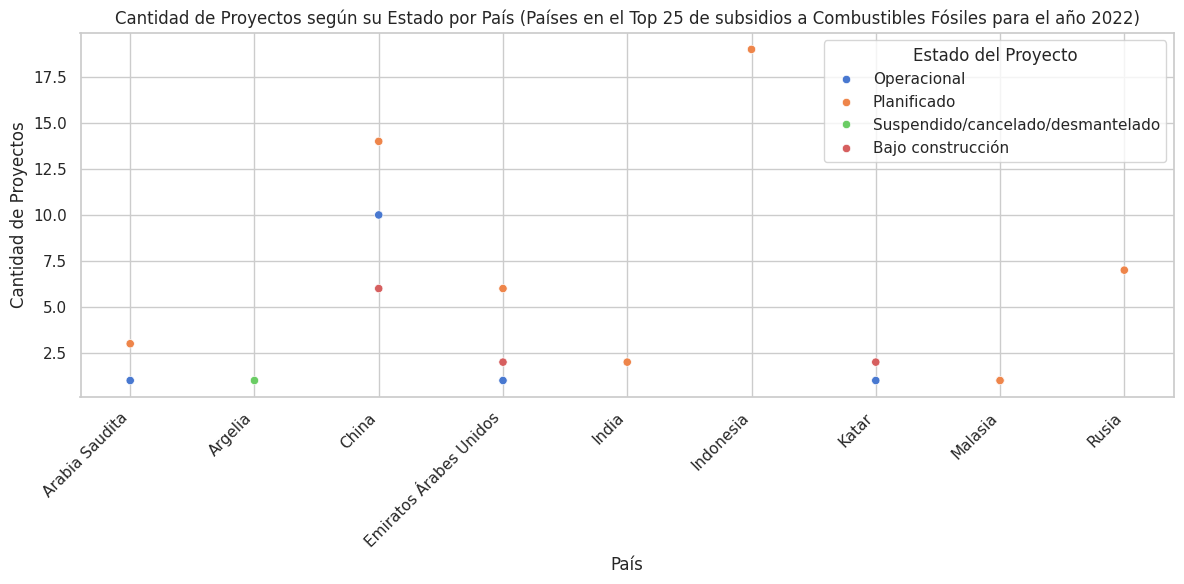

In [ ]:
# prompt: mapa with df_pet_c, cantidad de proyectos según su estado por país, scatter plot

# Assuming 'proyectos_iea' DataFrame is already loaded and processed as in the provided code.
# Group by country and project status, count projects
project_counts = df_pet_c.groupby(['Pais', 'Estado del Proyecto']).size().reset_index(name='Cantidad')

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=project_counts, x='Pais', y='Cantidad', hue='Estado del Proyecto')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Proyectos según su Estado por País (Países en el Top 25 de subsidios a Combustibles Fósiles para el año 2022)')
plt.xlabel('País')
plt.ylabel('Cantidad de Proyectos')
plt.tight_layout()
plt.show()



**Dataset 3**

Analisis Exploratorio de Datos (EDA)

In [ ]:
## Descripcion de las variables numéricas
df_China.describe()

In [ ]:
# Libreria Skimpy permite realizar estadistiscos descriptivos de variables categóricas
skim(df_China)

In [ ]:
df_China.head(5)

In [ ]:
df_China.tail(5)

In [ ]:
#Identificación de campos sin datos en la columna Captured CO2
df_China["Captured CO2/Mt"].unique()


In [ ]:
#Identificación de campos sin datos
df_China["Captured cost/($/t)"].unique()

In [ ]:
# Identificación de patrones de Captured cost/($/t)
Costo = df_China.groupby("Captured cost/($/t)").size().sort_values(ascending=False)
Costo

In [ ]:
China_Captura_Costo = df_China.groupby(["Captured CO2/Mt", "Captured cost/($/t)"]).size().sort_values(ascending=False)
China_Captura_Costo

In [ ]:
# Analisis estadistico - Medidas de Tendencia Central
plt.figure(figsize=(6,2))            ## Configuración del tamaño del grafico
plt.hist(df_China["Captured CO2/Mt"])  ## Histograma de Captured CO2/Mt
plt.title("Captured CO2/Mt")

Guardar Dataset para Usarlos en streamlit

In [ ]:
# Exportar el DataFrame del Data set 1 a CSV
proyectos_doe.to_csv('proyectos_doe.csv', index=False)

# Exportar el DataFrame del dataset 2 a CSV

proyectos_iea['AñoAnuncio'] = proyectos_iea['Announcement'].astype(str).str[:4]
proyectos_iea["AñoAnuncio"].replace("NaT","2020")


proyectos_iea.to_csv('proyectos_iea.csv', index=False)


Text(0.5, 1.0, 'Captured CO2/Mt')

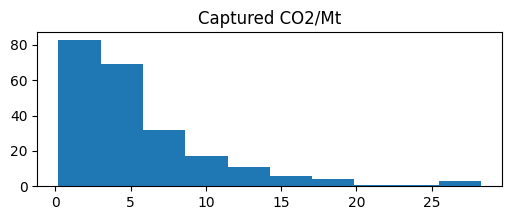

In [ ]:
# Analisis estadistico - Medidas de Tendencia Central
plt.figure(figsize=(6,2))            ## Configuración del tamaño del grafico
plt.hist(df_China["Captured CO2/Mt"])  ## Histograma de Captured CO2/Mt
plt.title("Captured CO2/Mt")

Text(0.5, 1.0, 'Captured cost/($/t)')

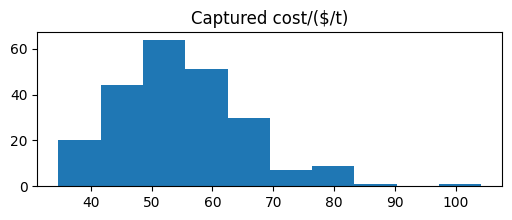

In [ ]:
# Analisis estadistico - Medidas de Tendencia Central
plt.figure(figsize=(6,2))            ## Configuración del tamaño del grafico
plt.hist(df_China["Captured cost/($/t)"])  ## Histograma de Captured CO2/Mt
plt.title("Captured cost/($/t)")

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


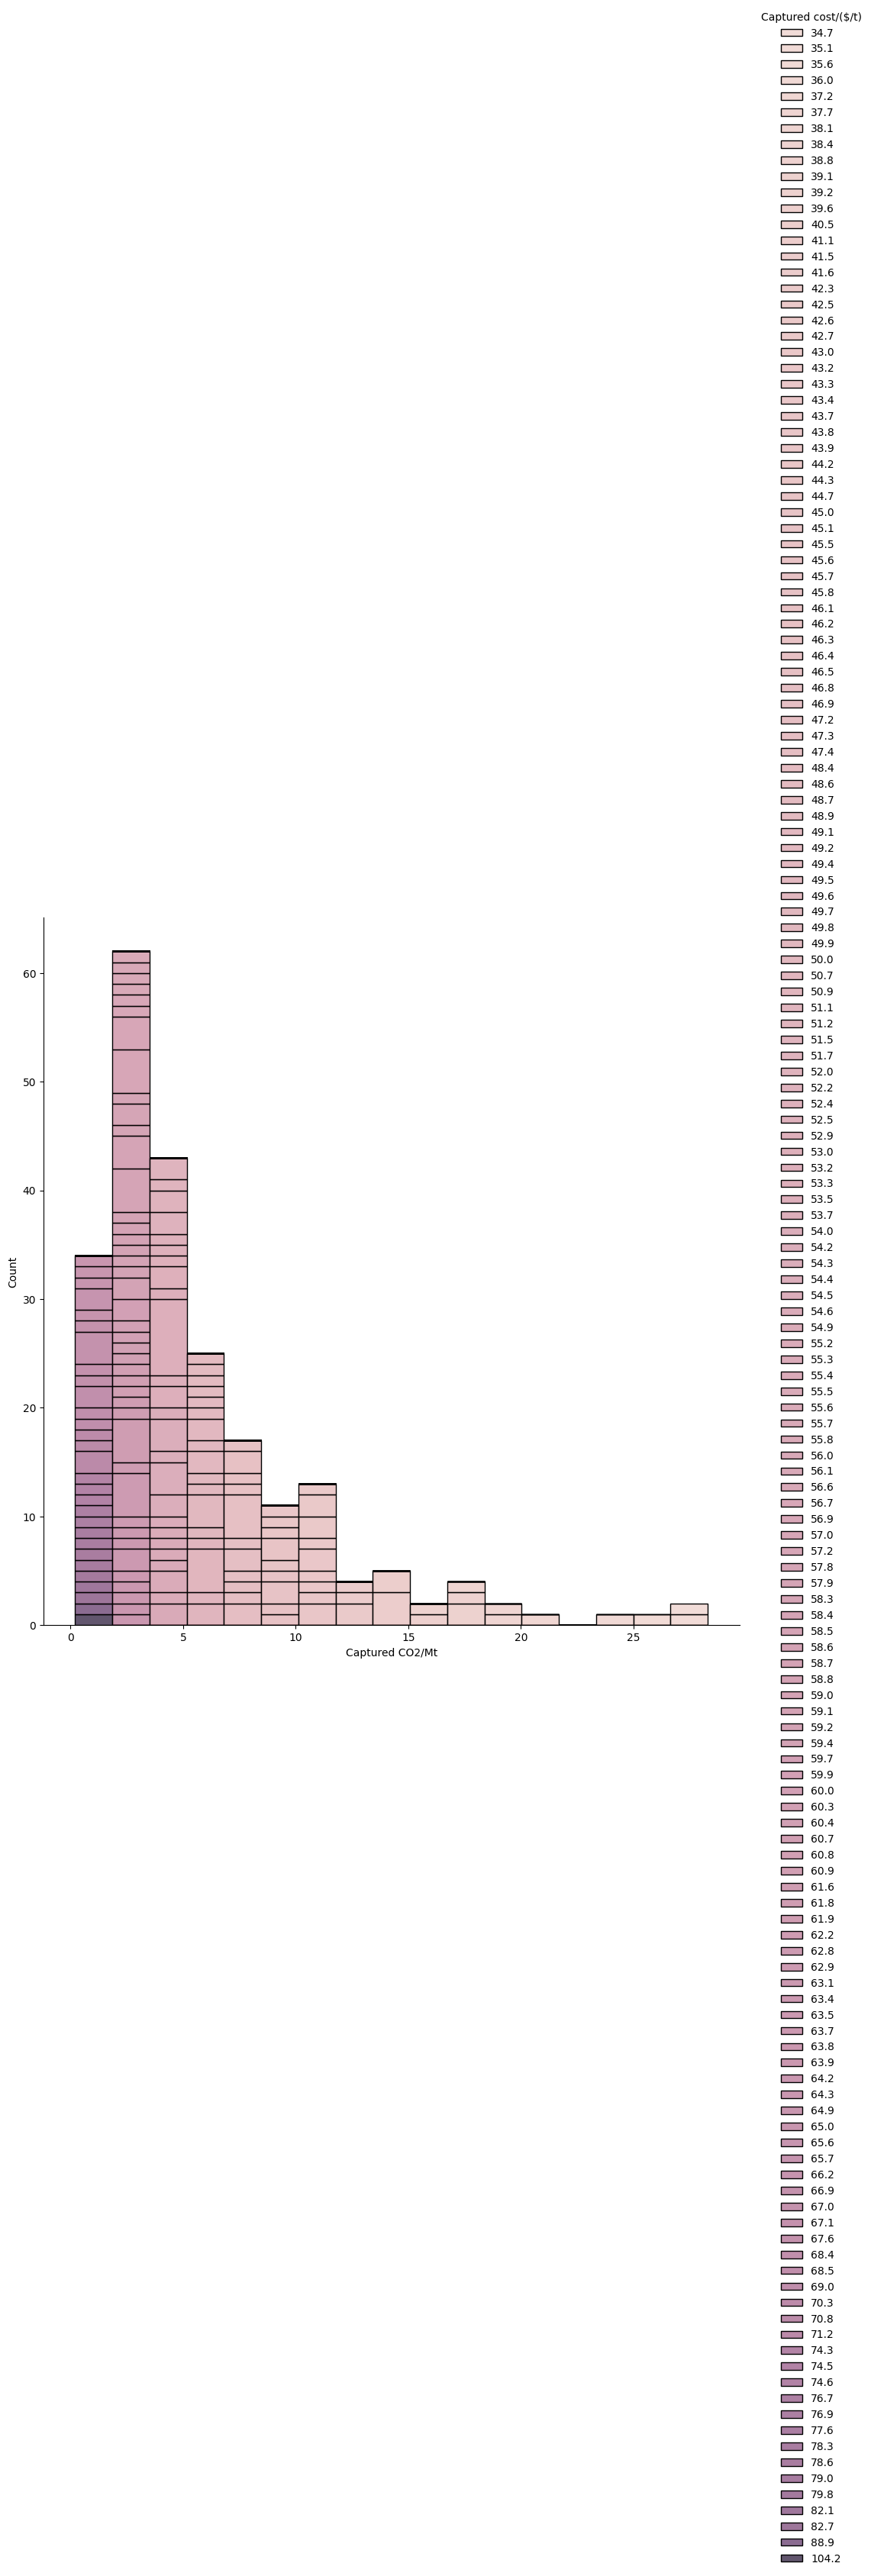

In [ ]:
#Librería Seaborn sns.displot
sns.displot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", multiple="stack", height=10, aspect=1)

<ipython-input-28-93891d4deeea>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", multiple="stack")


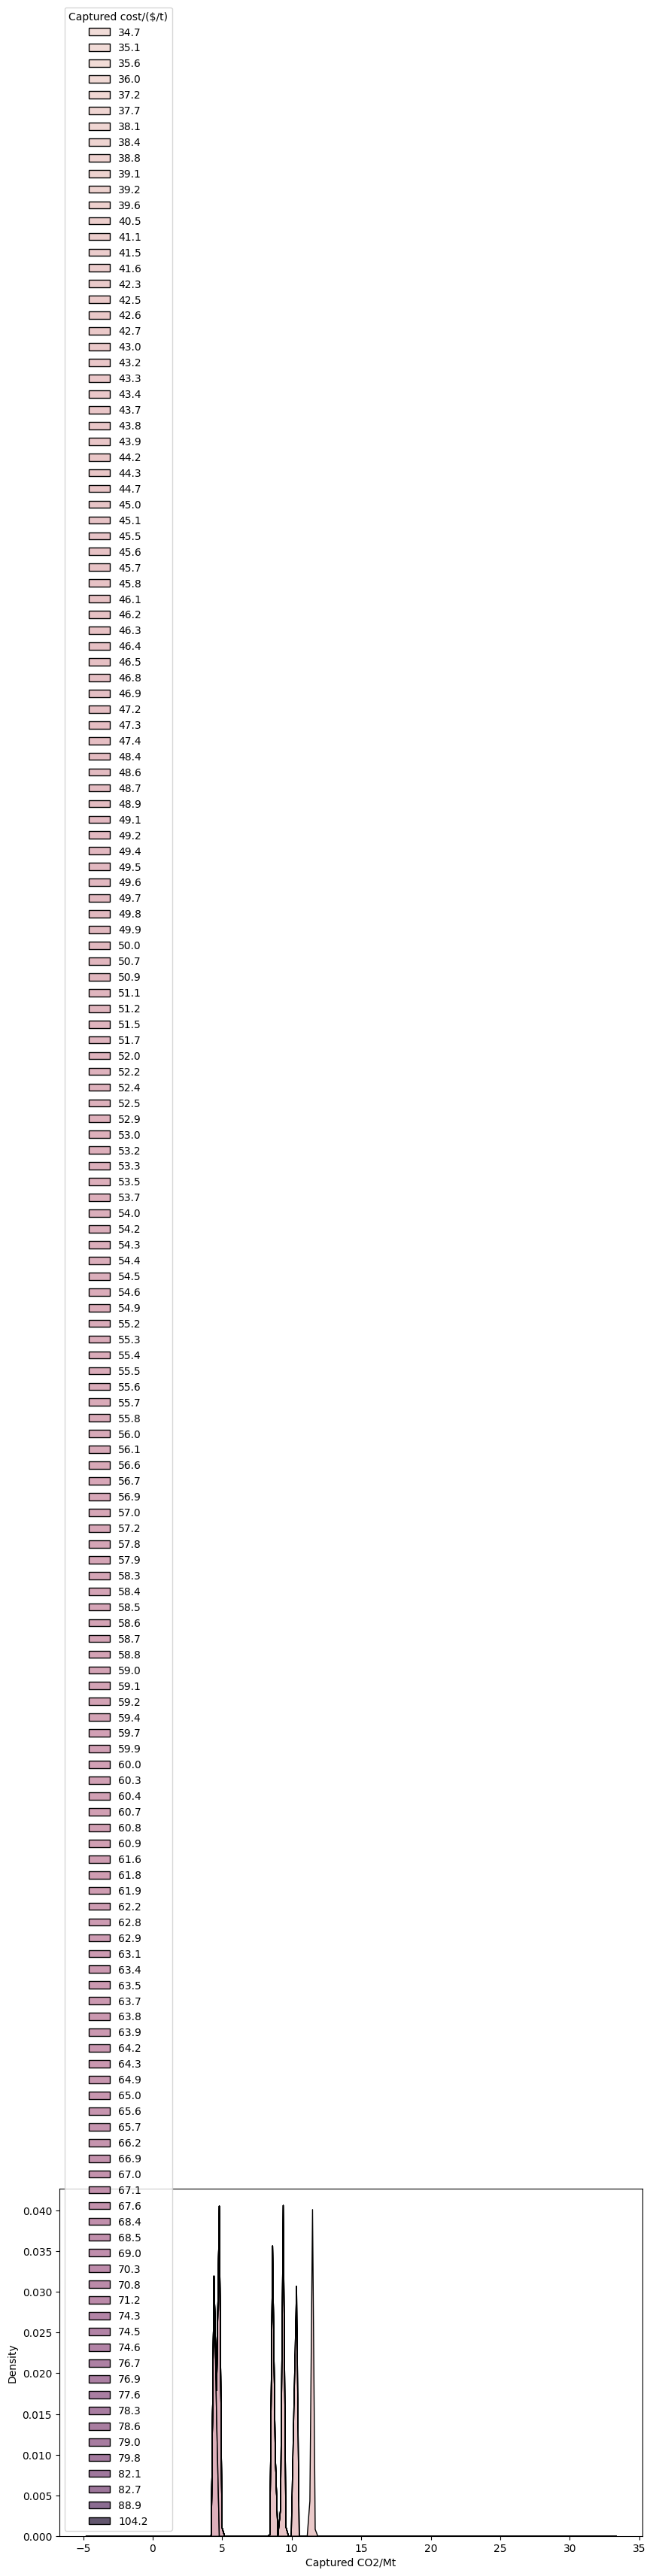

In [ ]:
# Correct approach to set figure size
plt.figure(figsize=(10, 6))  # Adjust figure size before plotting
sns.kdeplot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", multiple="stack")
plt.show()  # Display the plot
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn-kdeplot
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
#analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<ipython-input-29-913970fc10ef>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", kind="kde", multiple="stack")


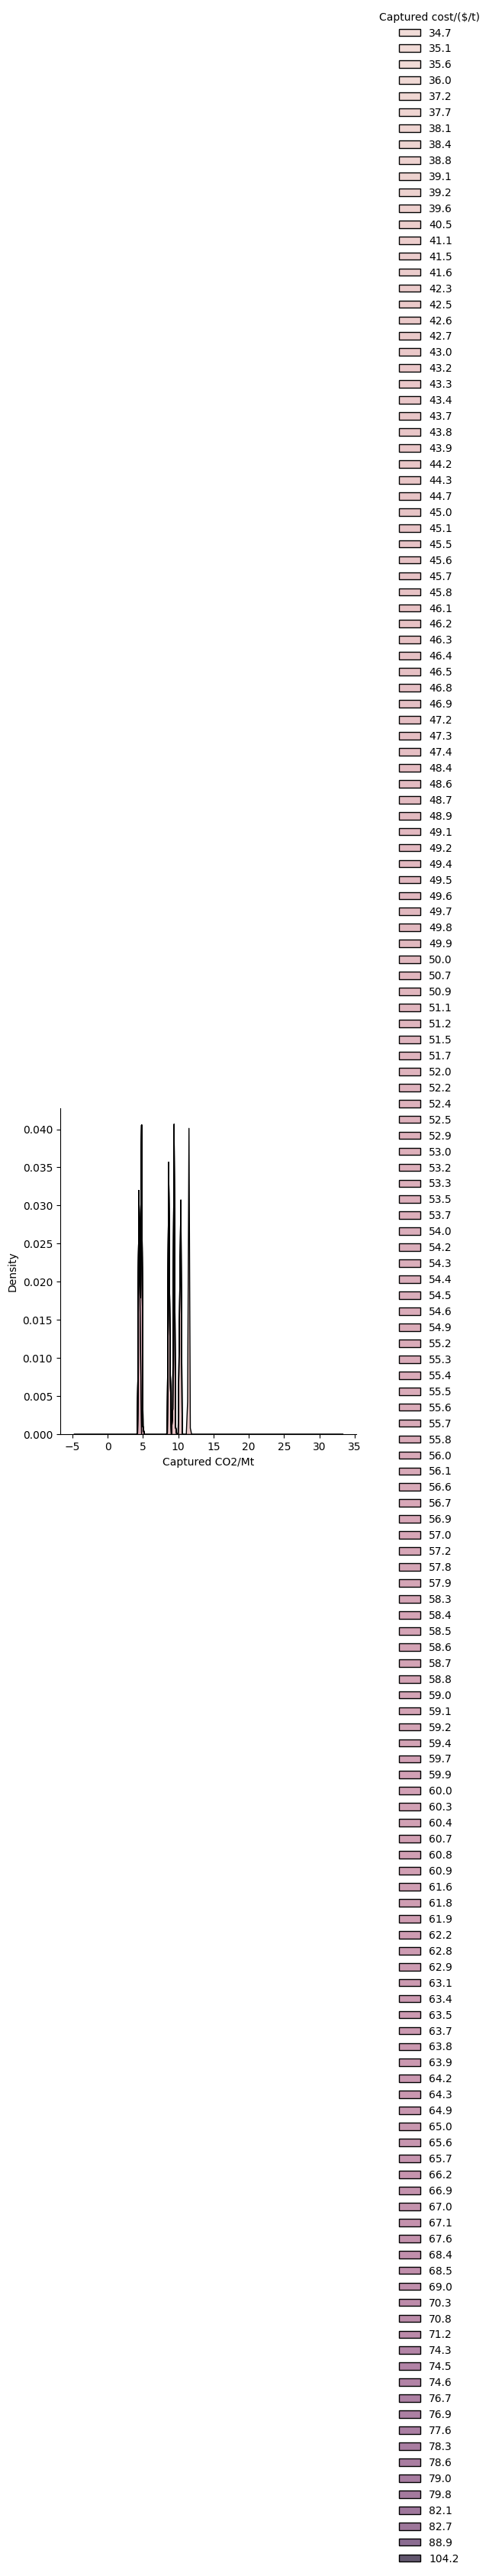

In [ ]:
sns.displot(df_China, x="Captured CO2/Mt", hue="Captured cost/($/t)", kind="kde", multiple="stack")

<ipython-input-30-81d9b94ca014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_China['Captured CO2/Mt'], y=df_China['Captured cost/($/t)'], palette="pastel")


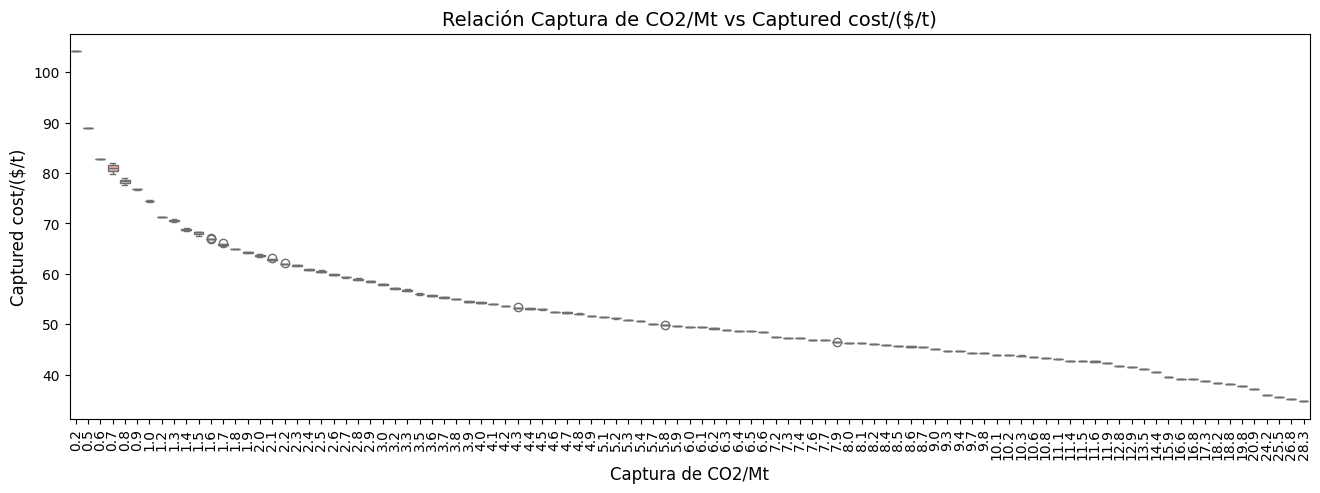

In [ ]:
#Boxplot
plt.figure(figsize=(16,5))
sns.boxplot(x=df_China['Captured CO2/Mt'], y=df_China['Captured cost/($/t)'], palette="pastel")
plt.title('Relación Captura de CO2/Mt vs Captured cost/($/t)', fontsize=14)
plt.xlabel('Captura de CO2/Mt', fontsize=12)
plt.ylabel('Captured cost/($/t)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<ipython-input-31-0b67190a9db2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_China['Captured CO2/Mt'], y=df_China['Captured cost/($/t)'], palette="pastel")


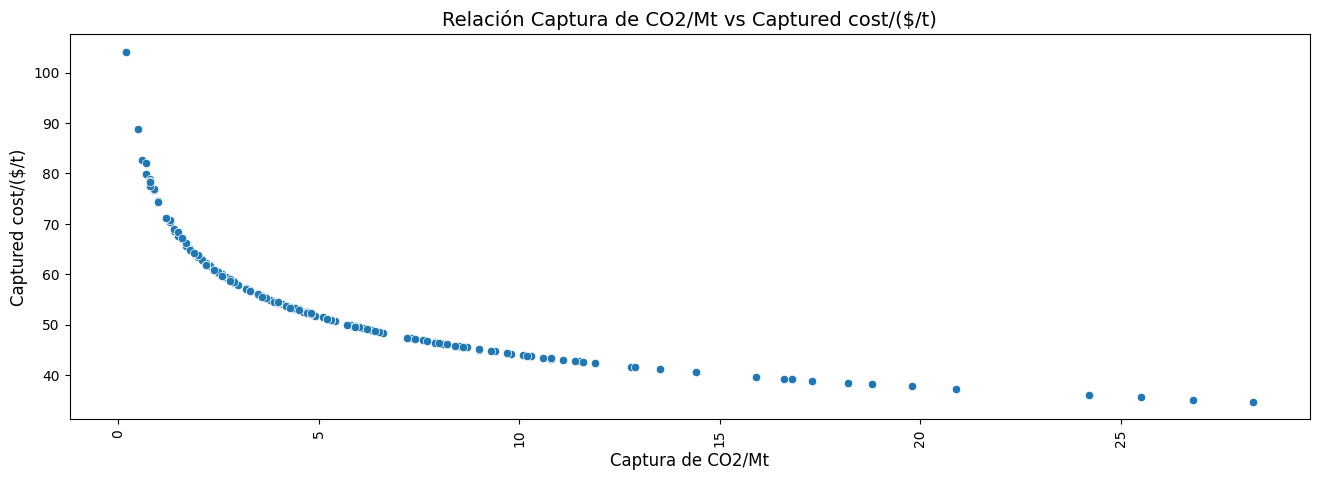

In [ ]:
#Scatterplot
plt.figure(figsize=(16,5))
sns.scatterplot(x=df_China['Captured CO2/Mt'], y=df_China['Captured cost/($/t)'], palette="pastel")
plt.title('Relación Captura de CO2/Mt vs Captured cost/($/t)', fontsize=14)
plt.xlabel('Captura de CO2/Mt', fontsize=12)
plt.ylabel('Captured cost/($/t)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Media de la variable "Captured CO2/Mt"
df_China['Captured CO2/Mt'].mean(axis=0)

np.float64(5.690748898678413)

In [ ]:
#Media de cada variable "Captured cost/($/t)"
df_China['Captured cost/($/t)'].mean(axis=0)

np.float64(54.897356828193836)

In [ ]:
#Varianza de la variable "Captured CO2/Mt"
df_China['Captured CO2/Mt'].var(axis=0)

24.471020233129305

In [ ]:
#Varianza de la variable "Captured CO2/Mt"
df_China['Captured cost/($/t)'].var(axis=0)

113.87078944290677

In [ ]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_, # Pass data as the first positional argument
    columns = df_China[numerical_features].columns, # Access columns from numerical_features
    index   = ['PC1', 'PC2'] # Correct the index to match the number of components
)

Captured CO2/Mt  Captured cost/($/t)
PC1         0.707107            -0.707107
PC2         0.707107             0.707107

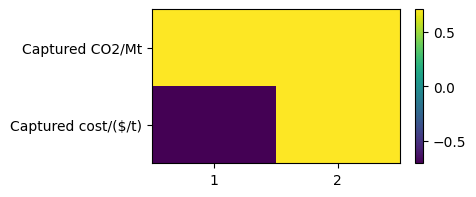

In [ ]:
#Heat Map
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_China[numerical_features].columns)), df_China[numerical_features].columns)
plt.xticks(range(len(df_China[numerical_features].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.90552436 0.09447564]


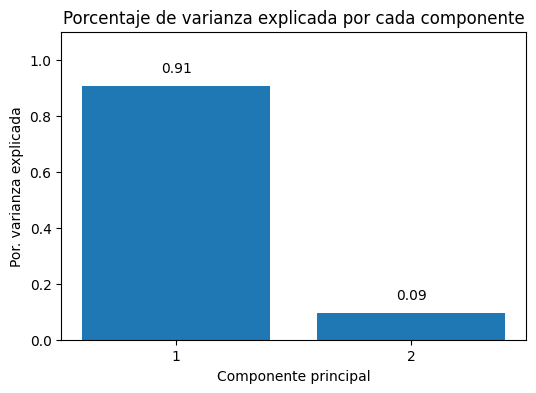

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_China[numerical_features].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
#Gráficos
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df_China.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

variable_1           variable_2         r     abs_r
1      Captured CO2/Mt  Captured cost/($/t) -0.811049  0.811049
2  Captured cost/($/t)      Captured CO2/Mt -0.811049  0.811049

In [ ]:
# 01/04/2025 Groupby del promedio de la captura de CO2 de cada provincia
Provincia = df_China.groupby("Province").agg({"Captured CO2/Mt": "mean"})
Provincia

Captured CO2/Mt
Province                       
Anhui                  5.800000
Chongqing              5.200000
Fujian                 3.742857
Gansu                  4.433333
Guangdong              6.266667
Guangxi                2.050000
Guizhou                5.400000
Hebei                  6.993617
Heilongjiang           4.100000
Henan                  3.142857
Hubei                  6.050000
Hunan                 11.333333
Inner Mongolia         4.688889
Jiangsu                6.340909
Jiangxi                8.825000
Jilin                  3.600000
Liaoning               8.350000
Ningxia                6.300000
Qinghai                2.200000
Shaanxi                6.200000
Shandong               5.594444
Shanghai              16.800000
Shanxi                 3.890909
Sichuan                8.900000
Tianjin                5.300000
Xinjiang               3.000000
Yunnan                 4.000000
Zhejiang               7.200000

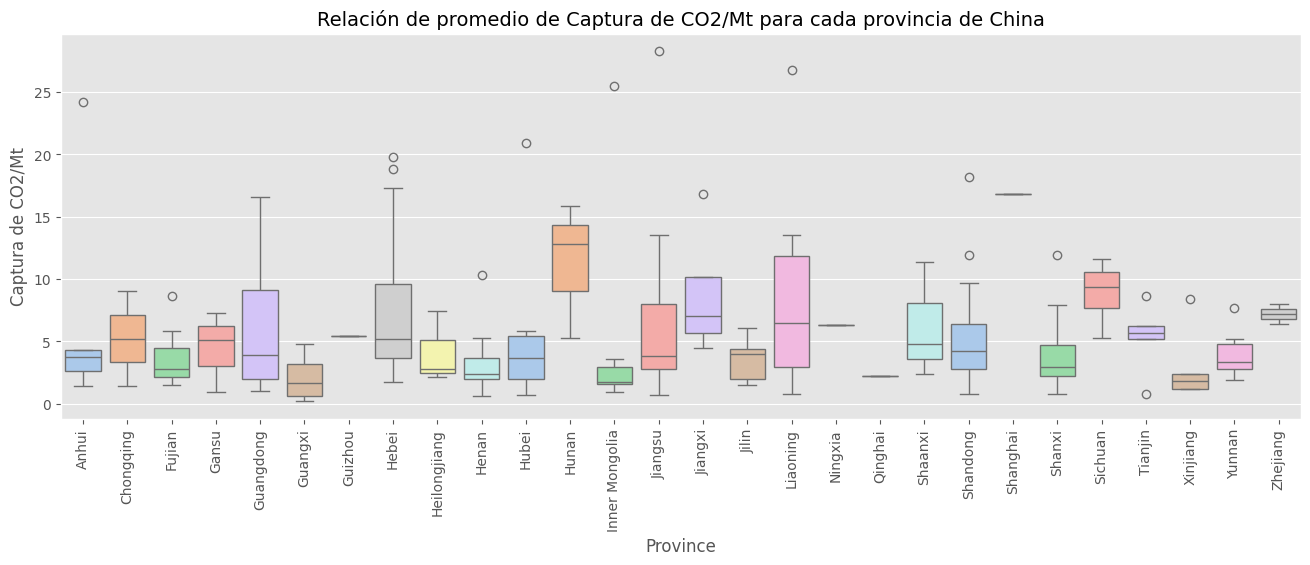

In [ ]:
#Boxplot Provincia - Captura
plt.figure(figsize=(16,5))
sns.boxplot(x=df_China['Province'], y=df_China['Captured CO2/Mt'], palette="pastel")
plt.title('Relación de promedio de Captura de CO2/Mt para cada provincia de China', fontsize=14)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Captura de CO2/Mt', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 01/04/2025 Groupby del promedio del CO2 de cada provincia
Provincia_Costo = df_China.groupby("Province").agg({"Captured cost/($/t)": "mean"})
Provincia_Costo

Captured cost/($/t)
Province                           
Anhui                     55.612500
Chongqing                 57.000000
Fujian                    57.857143
Gansu                     58.500000
Guangdong                 55.650000
Guangxi                   72.833333
Guizhou                   50.700000
Hebei                     50.491489
Heilongjiang              56.266667
Henan                     61.157143
Hubei                     57.933333
Hunan                     44.033333
Inner Mongolia            61.344444
Jiangsu                   53.645455
Jiangxi                   47.000000
Jilin                     57.840000
Liaoning                  51.091667
Ningxia                   48.900000
Qinghai                   62.200000
Shaanxi                   51.866667
Shandong                  54.022222
Shanghai                  39.100000
Shanxi                    57.559091
Sichuan                   45.725000
Tianjin                   54.820000
Xinjiang                  62.780000
Yunnan                    55.700000
Zhejiang                  47.500000

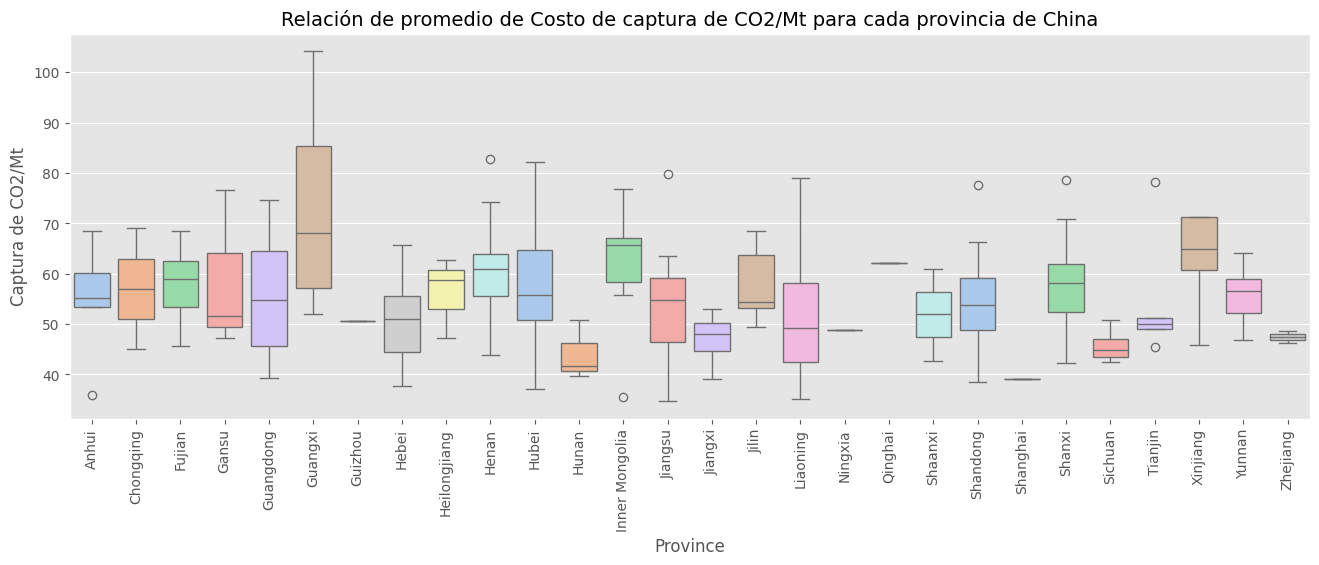

In [ ]:
#Boxplot Provincia - Costo
plt.figure(figsize=(16,5))
sns.boxplot(x=df_China['Province'], y=df_China['Captured cost/($/t)'], palette="pastel")
plt.title('Relación de promedio de Costo de captura de CO2/Mt para cada provincia de China', fontsize=14)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Captura de CO2/Mt', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Matriz de Covarianza
# Selecting only numerical columns for covariance calculation
numerical_df = df_China.select_dtypes(include=['number'])
numerical_df.cov(min_periods=None, ddof=1)

Captured CO2/Mt  Captured cost/($/t)
Captured CO2/Mt            24.471020           -42.813343
Captured cost/($/t)       -42.813343           113.870789

from matplotlib import pyplot as plt
_df_14['Captured CO2/Mt'].plot(kind='hist', bins=20, title='Captured CO2/Mt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Captured cost/($/t)'].plot(kind='hist', bins=20, title='Captured cost/($/t)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Captured CO2/Mt', y='Captured cost/($/t)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Captured cost/($/t)']
  ys = series['Captured CO2/Mt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Captured cost/($/t)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Captured cost/($/t)')
_ = plt.ylabel('Captured CO2/Mt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Captured cost/($/t)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Captured cost/($/t)'}, axis=1)
              .sort_values('Captured cost/($/t)', ascending=True))
  xs = counted['Captured cost/($/t)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Captured cost/($/t)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Captured cost/($/t)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_19['Captured CO2/Mt'].plot(kind='line', figsize=(8, 4), title='Captured CO2/Mt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Captured cost/($/t)'].plot(kind='line', figsize=(8, 4), title='Captured cost/($/t)')
plt.gca().spines[['top', 'right']].set_visible(False)

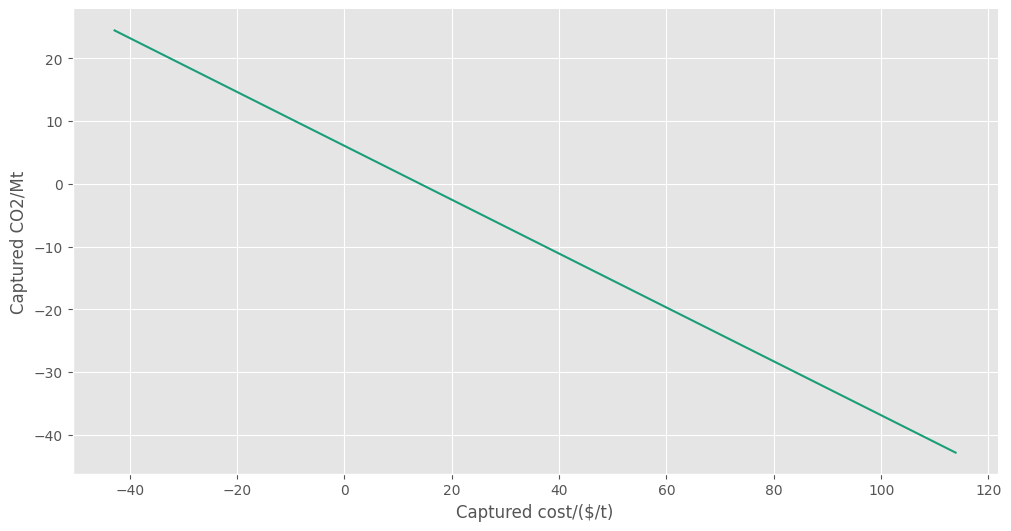

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Captured cost/($/t)']
  ys = series['Captured CO2/Mt']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Captured cost/($/t)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Captured cost/($/t)')
_ = plt.ylabel('Captured CO2/Mt')

Error cuadrático medio (MSE): 53.47079754351034
Coeficiente de determinación (R²): 0.5357591555132668


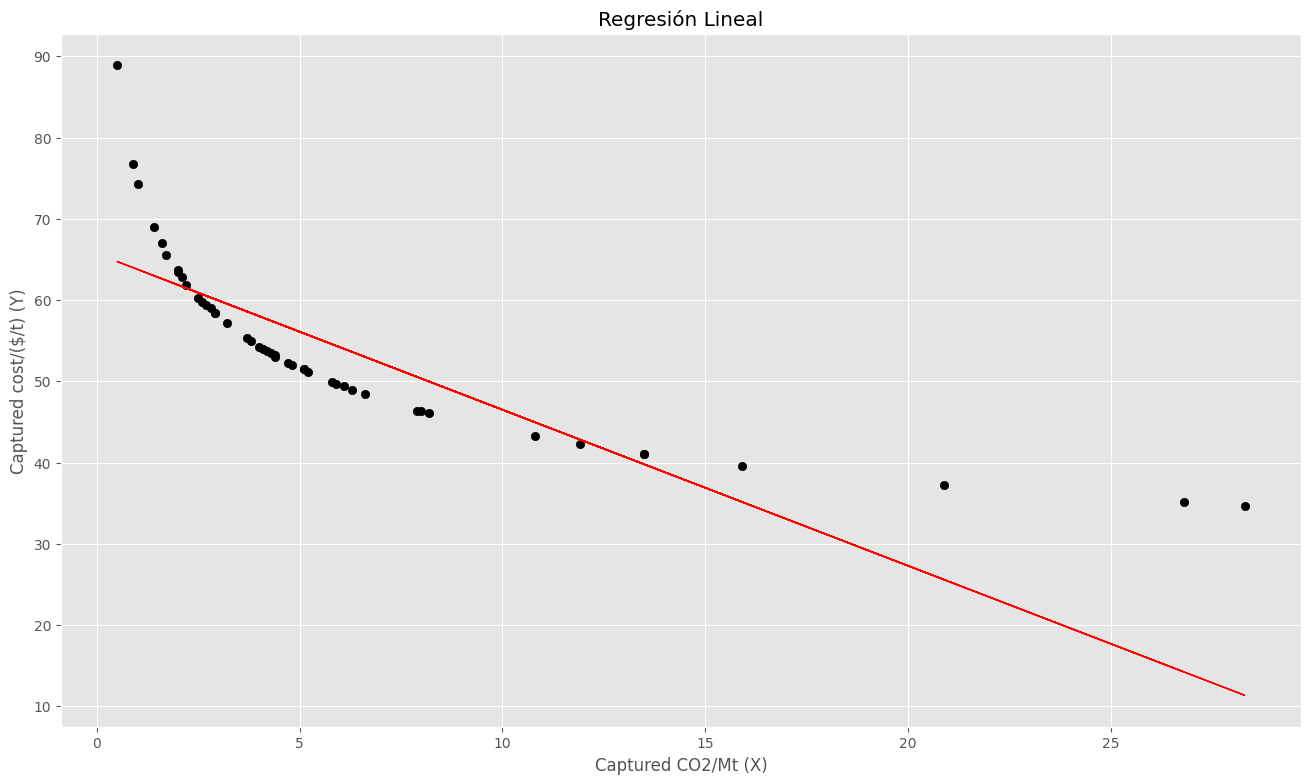

Coeficiente (pendiente): [[-1.91971314]]
Intercepción (ordenada al origen): [65.69670936]


In [ ]:
# Construcción y evaluación de modelos de regresión

## MODELO DE REGRESIÓN LINEAL

# 0. Importación de las librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generación de datos de ejemplo
X = df_China['Captured CO2/Mt'].values.reshape(-1, 1)
Y = df_China['Captured cost/($/t)'].values.reshape(-1, 1)

# 2. División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Realización de predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# 6. Visualización de los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.xlabel("Captured CO2/Mt (X)")
plt.ylabel("Captured cost/($/t) (Y)")
plt.title("Regresión Lineal")
plt.show()

# 7. Obtención de los coeficientes del modelo
print(f"Coeficiente (pendiente): {model.coef_}")
print(f"Intercepción (ordenada al origen): {model.intercept_}")

Error cuadrático medio (MSE): 2566.537937960089
Coeficiente de determinación (R²): -66.937988027694


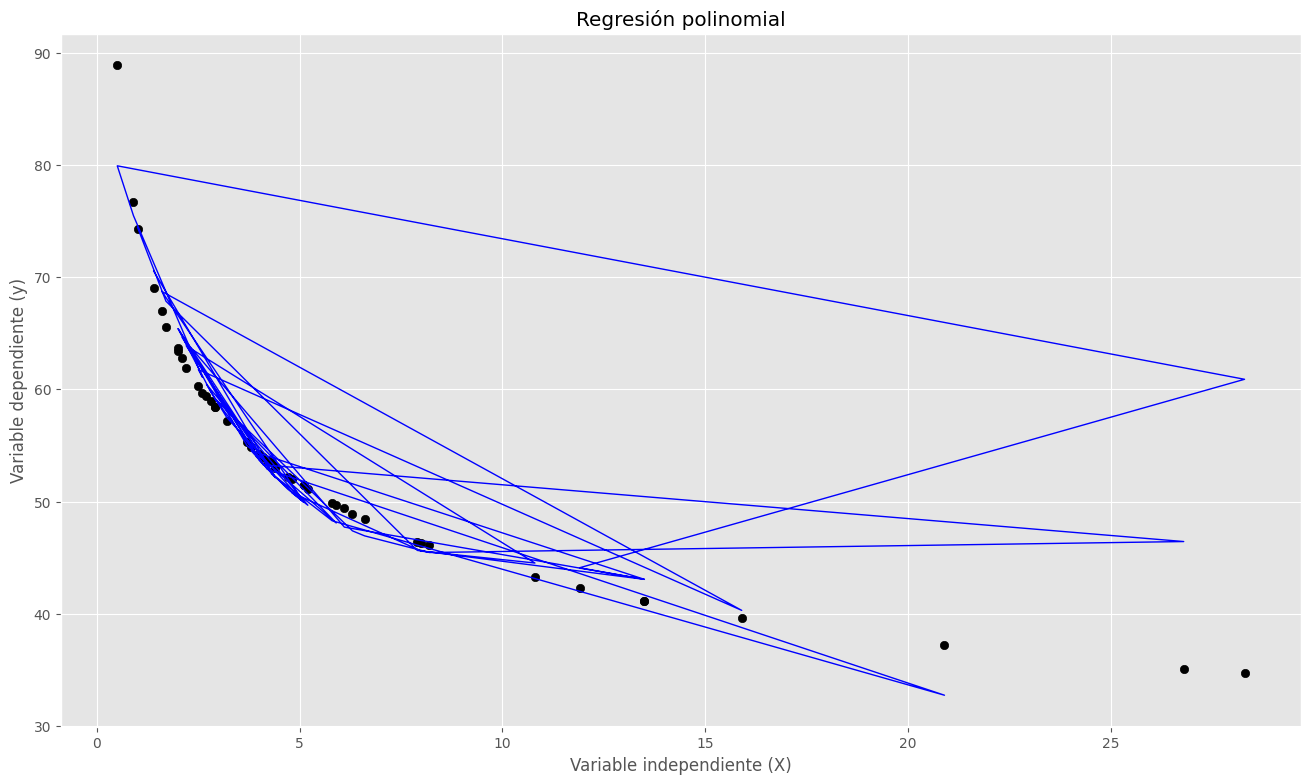

Coeficientes: [[ 0.00000000e+00 -1.31993081e+01  1.57083514e+00 -8.08832225e-02
   1.43969568e-03]]
Intercepción: [86.14848002]


In [ ]:
#MODELO DE AJUSTE POLINOMIAL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Determinación de las variables
np.random.seed(0)
A = df_China['Captured CO2/Mt'].values.reshape(-1, 1)
B = df_China['Captured cost/($/t)'].values.reshape(-1, 1)

# 2. División de datos en conjuntos de entrenamiento y prueba
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# 3. Transformación de características para el modelo polinomial
poly = PolynomialFeatures(degree=4)  # Grado n del modelo polinomial
A_train_poly = poly.fit_transform(A_train)
A_test_poly = poly.transform(A_test)

# 4. Entrenamiento del modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(A_train_poly, B_train)

# 5. Realización de predicciones
B_pred = model.predict(A_test_poly)

# 6. Evaluación del modelo
mse = mean_squared_error(A_test, B_pred)
r2 = r2_score(A_test, B_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# 7. Visualización de los resultados
plt.scatter(A_test, B_test, color='black')
plt.plot(A_test, B_pred, color='blue', linewidth=1)
plt.xlabel("Variable independiente (X)")
plt.ylabel("Variable dependiente (y)")
plt.title("Regresión polinomial")
plt.show()

# 8. Obtención de los coeficientes del modelo (después de la transformación polinómica)
print(f"Coeficientes: {model.coef_}")  # Incluye el término independiente
print(f"Intercepción: {model.intercept_}")

**Streamlit**

Diseño de Dashboard

In [ ]:
# Nota: OJO Es necesario crear una cuenta en ngrok.com para obtener un token de autenticación único.
# Esto permite exponer el servidor local a Internet.
# Una vez creada la cuenta, copia tu token desde el panel de ngrok y reemplaza el valor en la siguiente línea.

from pyngrok import ngrok
TokenNgrok="2uyEpPN3vIS13PfwtOWaEESlNyX_55HYdrA6EDAvc71umDa9n"
ngrok.set_auth_token("2uyEpPN3vIS13PfwtOWaEESlNyX_55HYdrA6EDAvc71umDa9n")


In [ ]:
# Uso de localtunnel para exponer el puerto local 8501 a Internet.
!npx localtunnel --port 8501
##Cuabdo corra se para para

⠙your url is: https://eight-spiders-say.loca.lt
^C


In [ ]:
%%writefile app.py

import plotly.express as px
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout="wide")

Titulo= "Data Carbon"
st.title("Graficos CARBON")

# Barra lateral
st.sidebar.title(Titulo)

graph_option = st.sidebar.radio("Selecciona un gráfico:"
  , ("Proyectos Mundiales"
  , "Comportamiento Proyectos por Año en el Mundo"
 ))


df_Paises = pd.read_csv("https://datos.canarias.es/catalogos/estadisticas/dataset/44dc4231-b23c-464d-a0b3-709c55ff4571/resource/36c79c62-04af-4fbf-88a7-2764303ae61c/download/paises_2016_geom_10.csv")
dfproyectos = pd.read_csv("/content/proyectos_iea.csv")
dfproyectos['AñoAnuncio'] = dfproyectos['AñoAnuncio'].astype("string")

dfproyectos= dfproyectos.replace("NaT","2020" )


def plot_Mapa():

  Titulo= "Proyectos en el mundo Dataset2"
  st.title(Titulo)

  df_estado=dfproyectos.groupby(["Pais"]).size().reset_index()

  df_estado.rename({0:"conteo"}, axis="columns", inplace=True)

  df_proyectopais=df_estado.merge(df_Paises, left_on="Pais", right_on="etiqueta", how="inner")

  fig = px.scatter_mapbox(df_proyectopais
                        ,lat="latitud"
                        ,lon="longitud"
                        ,hover_name= "Pais"
                        ,hover_data=["conteo"]
                        ,mapbox_style= "carto-positron"
                        ,zoom=8

                        )

  st.plotly_chart(fig, theme=None, use_container_width=True)


# Funciones para gráficos

def plot_pie(data):
    fig, ax = plt.subplots()
    ax.pie(data["Valores"], labels=data["Categoría"], autopct="%.1f%%")
    st.pyplot(fig)

def plot_EstadoAño():

  Titulo= "Comportamiento de los Proyectos en el mundo a través de los Años Dataset2"
  st.title(Titulo)

  df=dfproyectos.groupby(["Pais","Estado del Proyecto","Tipo de Proyecto","AñoAnuncio"]).size().reset_index()

  df = df.sort_values(by="AñoAnuncio", ascending=True)

  df.rename({0:"Cantidad"}, axis="columns", inplace=True)
  df.rename({"Estado del Proyecto":"Estado"}, axis="columns", inplace=True)
  df.rename({"Tipo de Proyecto":"Tipo"}, axis="columns", inplace=True)

  df_Data=df.merge(df_Paises, left_on="Pais", right_on="etiqueta", how="inner")

  fig = px.scatter(df_Data
        ,x="Cantidad"
        ,y="Cantidad"

        ,size="Cantidad"

        ,animation_frame="AñoAnuncio"

        ,animation_group="Pais"
        ,hover_name="Pais"

        ,facet_col="Tipo"
        ,color="Tipo"

        ,log_x=True, size_max=500, range_x=[1,1000], range_y=[1,1000]
                   )

  ##st.plotly_chart(fig, theme=None, use_container_width=True)
  st.plotly_chart(fig)


def plot_line():
    fig, ax = plt.subplots()
    sns.lineplot(x="Categoría", y="Otro", data=data, marker="o", ax=ax)
    st.pyplot(fig)

# Mostrar el gráfico seleccionado
tab1,tab2 = st.tabs(["Gráfico",""])

with tab1:
  st.header(graph_option)
  if graph_option == "Proyectos Mundiales":
      plot_Mapa()

  elif graph_option == "Comportamiento Proyectos por Año en el Mundo":
      plot_EstadoAño()
  elif graph_option == "Crecimiento Anual de Poyectos":
      plot_line()


Overwriting app.py


**EJECUCION DASHBOARD**

In [ ]:
##ACA EJECUTAMOS STREAMLIT EN SEGUNDO PLANO
# Ejecutar la aplicación Streamlit en segundo plano
!streamlit run app.py &>/content/logs.txt &

# Exposición de la nueva aplicación al público usando ngrok.
public_url = ngrok.connect(8501)
print(public_url)

##ACA ES DONDE GENERAMOS LA URL QUE VAMOS A USAR
#ABRIMOS LA URL

NgrokTunnel: "https://104d-35-232-177-255.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
ngrok.disconnect(8501)